# **Detecting Brute Force, DDoS, and DoS Attacks: A Supervised Learning Comparison**
---

## **Participants**

| Name           | Username         | Role              |
|----------------|------------------|-------------------|
| Kanchan Naik   | kanchan          | Developer, Writer |
| Spencer Dearman| dearmanspencer   | Developer, Writer |

## **Introduction**

Network attacks have become a big threat in today’s digital landscape, significantly impacting the security and availability of online services. Distributed Denial of Service (DDoS) attacks, Denial of Service (DoS) attacks, and brute force FTP attacks are all examples of the diverse range of threats that organizations face. DDoS attacks overwhelm services by flooding them with traffic from compromised devices, making them inaccessible to legitimate users. In 2016, for example, one of the most extensive instances of a DDoS attack was directed against the Domain Name System provider Dyn, creating a botnet composed of tens of millions of IP addresses. Major services, including Quora, Reddit, Amazon, SoundCloud, and the BBC, were entirely unavailable in North America and much of Europe for the duration of this attack, disrupting critical online activities such as e-commerce and voting.

Similarly, Denial of Service (DoS) attacks disrupt services by overwhelming them with traffic or exploiting vulnerabilities, but they originate from a single source rather than a distributed network. These attacks can cause significant downtime and resource exhaustion, further emphasizing the need for robust mitigation strategies. Brute force FTP attacks exploit weak passwords to gain unauthorized access to servers, highlighting the importance of strong authentication measures.

In our project, we will compare the effectiveness of various machine learning models such as Random Forest Trees, Naive Bayes, and Logistic Regression in detecting these different types of attacks. By evaluating how well each algorithm performs in detecting DDoS, DoS, and brute force FTP attacks, we will gain insights into their relative strengths and weaknesses, ultimately providing a comprehensive overview of their effectiveness in securing network infrastructures.

This research could help organizations understand which machine learning models are most effective in detecting and mitigating various network attacks, improving their ability to secure sensitive data and maintain service availability. Previous research in this area has primarily focused on evaluating machine learning models for attack detection, but such studies are often limited in scope, typically examining attacks from a single dataset.

## **Brute Force Attack**

A brute force network attack is a technique that is used by attackers to gain unauthorized access to a system or network by repeatedly trying different combinations of usernames, passwords, or encryption keys until the correct one is found. It relies on sheer computational power and persistence rather than exploiting system vulnerabilities. This type of attack can be resource-intensive and time-consuming, but it is often effective against systems with weak passwords or poorly configured authentication mechanisms.

## **Distributed Denial of Service (DDoS) Attack**

A Distributed Denial of Service (DDoS) attack is an attempt to disrupt the normal functioning of a server, network, or website by overwhelming it with a massive volume of traffic. This type of attack is “distributed” because it involves multiple compromised devices, often part of a botnet, which work together to flood the target with requests. The goal of a DDoS attack is to exhaust the target’s resources, such as bandwidth or server capacity, making it inaccessible to legitimate users. These attacks are usually launched by exploiting vulnerabilities in systems or by taking control of many devices to amplify the scale of the traffic.

## **Denial of Service (DoS) Attack**

A Denial of Service (DoS) attack is an attempt to make a server, network, or service unavailable to its intended users by overwhelming it with a flood of traffic or sending data that exploits vulnerabilities in the system. Unlike a DDoS attack, a DoS attack is launched from a single source rather than multiple distributed devices. The goal is to exhaust the target’s resources, such as processing power or memory, so it cannot handle legitimate requests. This type of attack disrupts normal operations, causing inconvenience or financial loss to the target.

## **Data**

The Canadian Institute for Cybersecurity Intrusion Detection System (CICIDS) datasets, collected by the University of New Brunswick, serve as a comprehensive resource for intrusion detection. These datasets include both benign traffic and a range of contemporary attacks, including DDoS, DoS, and brute force attacks, collected in packet capture (PCAP) files. To create these datasets, the researchers focused on generating realistic background traffic which resembles human interactions on the Internet for a capturing period of five days. During this period, various attacks were executed at different times. The researchers then aggregated the packet-level data into network flows, calculating a set of features which include both continuous variables (ie. flow duration, byte counts, packet counts, etc.) and categorical variables (source and destination ports, protocol types, etc.). The resulting dataset is both comprehensive and structured, allowing for supervised machine learning models to differentiate network traffic patterns and behavior. 

For this project, we used two research datasets—CCIDS2017 and CCIDS2018—to analyze how machine learning detection systems respond to attacks which evolve over time. These datasets were chosen because they maintain consistency in the data collection methodology, with both relying on packet capture (PCAP) files aggregated into flow-level features. Additionally, both datasets include examples of the three attack types we are studying—DoS, DDoS, and brute force attacks —allowing for a comprehensive comparison of detection performance across different attack scenarios. By using these datasets, we were able to ensure a consistent evaluation framework while focusing on a broad range of network-based attacks.



#### **Data Download + Setup**
<!-- exclude -->
This will automatically check if the data is not already downloaded.

In [1]:
#exclude
# Install all the packages listed in requirements.txt
!pip install -r requirements.txt

import os
import gdown

data_folder = "data"
if not os.path.exists(data_folder):
    data_link = "https://drive.google.com/drive/folders/10Ni3TRAZgN03ew-7saThNhTm6v0Ky4Xz?usp=drive_link"
    gdown.download_folder(data_link)
else:
    print(f"{data_folder} folder already exists. Skipping creation/download.")


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
data folder already exists. Skipping creation/download.


#### **General Imports**
<!-- exclude -->

In [2]:
#exclude
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

### **2017 Datasets**
<!-- exclude -->

In [3]:
#exclude
pre_brute_force_2017_df = pd.read_csv('data/2017/brute-force-2017.csv')
pre_ddos_2017_df = pd.read_csv('data/2017/ddos-2017.csv')
pre_dos_2017_df = pd.read_csv('data/2017/dos-2017.csv')

### **2018 Datasets**
<!-- exclude -->

In [4]:
#exclude
pre_brute_force_2018_df = pd.read_csv('data/2018/brute-force-2018.csv')
pre_ddos_2018_df = pd.read_csv('data/2018/ddos-2018.csv')
pre_dos_2018_df = pd.read_csv('data/2018/dos-2018.csv')

/var/folders/zz/1dtb5n794qbf5bn8fxwmn2zw0000gn/T/ipykernel_50983/2510871074.py:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  pre_dos_2018_df = pd.read_csv('data/2018/dos-2018.csv')


# **Data Processing and Statistics**
---

## **Cleaning Process**

To clean the data for analysis, we followed a multi-step process to ensure consistency and relevance across both datasets. First and foremost, we removed any rows containing null or empty values, as these would interfere with model training and evaluation. We also filtered out examples that did not correspond to the attack types we were focusing on—DoS, DDoS, and brute force attacks. While both datasets included additional attack types, such as Heartbleed and various web attacks, these were not relevant to our research, so we excluded them.
Next, we standardized the feature set between the two datasets. This was crucial because our machine learning models required a consistent feature vector. We started by removing features that only appeared in one of the datasets. For example, the ‘Protocol’ column was present in the CCIDS2018 dataset but not in the CCIDS2017 dataset, so we dropped it from the 2018 dataset to ensure uniformity.
Additionally, we addressed discrepancies in column naming between the two datasets. Many columns in CCIDS2018 used abbreviated names (e.g., 'Bwd Header Len') that differed from the more descriptive names in CCIDS2017 (e.g., 'Bwd Header Length'). To resolve this, we mapped the column names between the two datasets using a predefined dictionary, ensuring that similar features were properly aligned. This allowed us to merge the datasets into a cohesive dataset that could be used for machine learning modeling. 


<!-- exclude -->
Copies of the original datasets are created here, so that every time we run individual cells in the notebook, you don't have to perform the expensive operation of reading directly from the CSV.

In [5]:
#exclude
brute_force_2017_df = pre_brute_force_2017_df.copy()
ddos_2017_df = pre_ddos_2017_df.copy()
dos_2017_df = pre_dos_2017_df.copy()

brute_force_2018_df = pre_brute_force_2018_df.copy()
ddos_2018_df = pre_ddos_2018_df.copy()
dos_2018_df = pre_dos_2018_df.copy()

<!-- exclude -->
Below are helper functions which has been used to parse columns in each dataset and map columns from the 2017 dataset to those in 2018. 

In [6]:
#exclude
# There are a lot of features in 2017 and 2018 with similar names, below is the mapping:
column_mapping = {
    'ACK Flag Cnt': 'ACK Flag Count',
    'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
    'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
    'Bwd Header Len': 'Bwd Header Length',
    'Bwd IAT Tot': 'Bwd IAT Total',
    'Bwd Pkt Len Max': 'Bwd Packet Length Max',
    'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
    'Bwd Pkt Len Min': 'Bwd Packet Length Min',
    'Bwd Pkt Len Std': 'Bwd Packet Length Std',
    'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk',
    'Bwd Pkts/s': 'Bwd Packets/s',
    'Bwd Seg Size Avg': 'Avg Bwd Segment Size',
    'Dst Port': 'Destination Port',
    'ECE Flag Cnt': 'ECE Flag Count',
    'FIN Flag Cnt': 'FIN Flag Count',
    'Flow Byts/s': 'Flow Bytes/s',
    'Flow Pkts/s': 'Flow Packets/s',
    'Fwd Act Data Pkts': 'act_data_pkt_fwd',
    'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate',
    'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
    'Fwd Header Len': 'Fwd Header Length',
    'Fwd IAT Tot': 'Fwd IAT Total',
    'Fwd Pkt Len Max': 'Fwd Packet Length Max',
    'Fwd Pkt Len Mean': 'Fwd Packet Length Mean',
    'Fwd Pkt Len Min': 'Fwd Packet Length Min',
    'Fwd Pkt Len Std': 'Fwd Packet Length Std',
    'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk',
    'Fwd Pkts/s': 'Fwd Packets/s',
    'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
    'Fwd Seg Size Min': 'min_seg_size_forward',
    'Init Bwd Win Byts': 'Init_Win_bytes_backward',
    'Init Fwd Win Byts': 'Init_Win_bytes_forward',
    'PSH Flag Cnt': 'PSH Flag Count',
    'Pkt Len Max': 'Max Packet Length',
    'Pkt Len Mean': 'Packet Length Mean',
    'Pkt Len Min': 'Min Packet Length',
    'Pkt Len Std': 'Packet Length Std',
    'Pkt Len Var': 'Packet Length Variance',
    'Pkt Size Avg': 'Average Packet Size',
    'Protocol': 'Protocol',
    'RST Flag Cnt': 'RST Flag Count',
    'SYN Flag Cnt': 'SYN Flag Count',
    'Subflow Bwd Byts': 'Subflow Bwd Bytes',
    'Subflow Bwd Pkts': 'Subflow Bwd Packets',
    'Subflow Fwd Byts': 'Subflow Fwd Bytes',
    'Subflow Fwd Pkts': 'Subflow Fwd Packets',
    'Tot Bwd Pkts': 'Total Backward Packets',
    'Tot Fwd Pkts': 'Total Fwd Packets',
    'TotLen Bwd Pkts': 'Total Length of Bwd Packets',
    'TotLen Fwd Pkts': 'Total Length of Fwd Packets',
    'URG Flag Cnt': 'URG Flag Count'
}

def parse_columns(df_2017, df_2018):
    df_2017.columns = df_2017.columns.str.strip()
    df_2018.columns = df_2018.columns.str.strip() 

    # Replace 'BENIGN' with 'Benign' in both datasets
    df_2017 = df_2017.replace('BENIGN', 'Benign')
    df_2018 = df_2018.replace('BENIGN', 'Benign')

    print(df_2017.loc[:, 'Label'].unique()) 

    # Rename columns in the 2018 dataset using the column mapping
    df_2018 = df_2018.rename(columns=column_mapping) 

    # Remove Timestamp column
    df_2018 = df_2018.drop(columns=['Timestamp'], errors='ignore')

    # Drop a duplicate column 
    df_2017 = df_2017.drop(columns=['Fwd Header Length.1'], errors='ignore')

    print("Number of columns in 2018 dataset:", len(df_2018.columns))
    print("Number of columns in 2017 dataset:", len(df_2017.columns))

    return df_2017, df_2018

def compare_years(df_2017, df_2018):
    # Columns present in 2018 but not in 2017
    columns_in_2018_not_in_2017 = df_2018.columns.difference(df_2017.columns)
    print("Columns in 2018 but not in 2017:")
    print(columns_in_2018_not_in_2017)

    # Columns present in 2017 but not in 2018
    columns_in_2017_not_in_2018 = df_2017.columns.difference(df_2018.columns)
    print("Columns in 2017 but not in 2018:")
    print(columns_in_2017_not_in_2018)

In [7]:
#exclude
# Cleaning specific to this dataframe
brute_force_2017_df = brute_force_2017_df.replace('FTP-Patator', 'FTP-BruteForce')
brute_force_2017_df = brute_force_2017_df.replace('SSH-Patator', 'SSH-Bruteforce')

# Calling parse_columns function and getting updated DataFrames
brute_force_2017_df, brute_force_2018_df = parse_columns(brute_force_2017_df, brute_force_2018_df)

# Calling compare_years function to compare the columns
compare_years(brute_force_2017_df, brute_force_2018_df)

# This indicates that features in the 2018 dataset include Protocol and Timestamp, which are not included in the 2017 dataset. 
# There are no features from the 2017 dataset which are not included in the 2018 dataset.

['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']
Number of columns in 2018 dataset: 79
Number of columns in 2017 dataset: 78
Columns in 2018 but not in 2017:
Index(['Protocol'], dtype='object')
Columns in 2017 but not in 2018:
Index([], dtype='object')


In [8]:
#exclude
# Cleaning specific to this dataframe
ddos_2018_df = ddos_2018_df.replace('DDoS attacks-LOIC-HTTP', 'DDoS')
ddos_2018_df = ddos_2018_df.replace('DDOS attack-LOIC-UDP', 'DDoS')
ddos_2018_df = ddos_2018_df.replace('DDOS attack-HOIC', 'DDoS')

# Calling parse_columns function and getting updated DataFrames
ddos_2017_df, ddos_2018_df = parse_columns(ddos_2017_df, ddos_2018_df)

# Calling compare_years function to compare the columns
compare_years(ddos_2017_df, ddos_2018_df)

# This indicates that features in the 2018 dataset include ''Protocol' and 'Timestamp', which are not included in the 2017 dataset. 
# There are no features from the 2017 dataset which are not included in the 2018 dataset.

['Benign' 'DDoS']
Number of columns in 2018 dataset: 79
Number of columns in 2017 dataset: 78
Columns in 2018 but not in 2017:
Index(['Protocol'], dtype='object')
Columns in 2017 but not in 2018:
Index([], dtype='object')


In [9]:
#exclude
# Cleaning specific to these dataframes
dos_2017_df.columns = dos_2017_df.columns.str.strip()
dos_2018_df.columns = dos_2018_df.columns.str.strip()
dos_2017_df = dos_2017_df.replace('DoS slowloris', 'DoS')
dos_2017_df = dos_2017_df.replace('DoS Slowhttptest', 'DoS')
dos_2017_df = dos_2017_df.replace('DoS Hulk', 'DoS')
dos_2017_df = dos_2017_df.replace('DoS GoldenEye', 'DoS')
dos_2017_df = dos_2017_df[dos_2017_df['Label'] != 'Heartbleed']
dos_2017_df = dos_2017_df[dos_2017_df['Label'] != 'Label']

dos_2018_df = dos_2018_df.replace('DoS attacks-SlowHTTPTest', 'DoS')
dos_2018_df = dos_2018_df.replace('DoS attacks-Hulk', 'DoS')
dos_2018_df = dos_2018_df[dos_2018_df['Label'] != 'Heartbleed']
dos_2018_df = dos_2018_df[dos_2018_df['Label'] != 'Label']

# Calling parse_columns function and getting updated DataFrames
dos_2017_df, dos_2018_df = parse_columns(dos_2017_df, dos_2018_df)

# Calling compare_years function to compare the columns
compare_years(dos_2017_df, dos_2018_df)

# This indicates that features in the 2018 dataset include Protocol and Timestamp, which are not included in the 2017 dataset. 
# There are no features from the 2017 dataset which are not included in the 2018 dataset.

['Benign' 'DoS']
Number of columns in 2018 dataset: 79
Number of columns in 2017 dataset: 78
Columns in 2018 but not in 2017:
Index(['Protocol'], dtype='object')
Columns in 2017 but not in 2018:
Index([], dtype='object')


In [10]:
#exclude
# Replace inf and -inf with NaN
brute_force_2017_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
brute_force_2017_df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = brute_force_2017_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

brute_force_2017_df['Label'] = brute_force_2017_df['Label'].map({'Benign': 0, 'FTP-BruteForce': 1, 'SSH-Bruteforce': 2})
print(brute_force_2017_df.loc[:,'Label'].unique())

Non-numeric columns: Index(['Label'], dtype='object')
[0 1 2]


In [11]:
#exclude
# Replace inf and -inf with NaN
brute_force_2018_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#print(brute_force_2017_df.loc[:,'Label'].unique())
#
# Drop rows with NaN values
brute_force_2018_df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = brute_force_2018_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

brute_force_2018_df['Label'] = brute_force_2018_df['Label'].map({'Benign': 0, 'FTP-BruteForce': 1, 'SSH-Bruteforce': 2})
print(brute_force_2018_df.loc[:,'Label'].unique())

Non-numeric columns: Index(['Label'], dtype='object')
[0 1 2]


In [12]:
#exclude
# Replace inf and -inf with NaN
ddos_2017_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#print(brute_force_2017_df.loc[:,'Label'].unique())
#
# Drop rows with NaN values
ddos_2017_df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = ddos_2017_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

ddos_2017_df['Label'] = ddos_2017_df['Label'].map({'Benign': 0, 'DDoS': 1})
print(ddos_2017_df.loc[:,'Label'].unique())

Non-numeric columns: Index(['Label'], dtype='object')
[0 1]


In [13]:
#exclude
# Replace inf and -inf with NaN
ddos_2018_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#print(brute_force_2017_df.loc[:,'Label'].unique())
#
# Drop rows with NaN values
ddos_2018_df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = ddos_2018_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

ddos_2018_df['Label'] = ddos_2018_df['Label'].map({'Benign': 0, 'DDoS': 1})
print(ddos_2018_df.loc[:,'Label'].unique())

Non-numeric columns: Index(['Label'], dtype='object')
[0 1]


In [14]:
#exclude
# Replace inf and -inf with NaN
dos_2017_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
dos_2017_df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = dos_2017_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

dos_2017_df['Label'] = dos_2017_df['Label'].map({'Benign': 0, 'DoS': 1})
dos_count = (dos_2017_df['Label'] == 1).sum()
non_dos_count = (dos_2017_df['Label'] == 0).sum()

Non-numeric columns: Index(['Label'], dtype='object')


In [15]:
#exclude
# Replace inf and -inf with NaN
dos_2018_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
dos_2018_df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = dos_2018_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

dos_2018_df['Label'] = dos_2018_df['Label'].map({'Benign': 0, 'DoS': 1})
print(dos_2018_df.loc[:,'Label'].unique())

Non-numeric columns: Index(['Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN

<!-- exclude -->
## **Preprocessing Helper Functions**

In [16]:
#exclude
# Function to plot class distribution for a given dataset
def plot_class_distribution(df, class_names, title):
  """
  Plots a bar chart showing the distribution of classes.
  
  Parameters:
  df : DataFrame : The dataframe containing the 'Label' column
  class_names : list : List of class labels
  title : str : The title of the plot
  """
  # Plot the class distribution as a bar chart
  plt.bar(df['Label'].value_counts().index, df['Label'].value_counts(), 
          color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')
  plt.xticks(df['Label'].value_counts().index, labels=class_names)
  plt.xlabel('Classes')
  plt.ylabel('Count')
  plt.title(title)
  plt.show()

# Function to plot a comparative bar chart between two years for each attack type
def plot_comparative_bar_chart(data_2017, data_2018, class_names, title):
  """
  Plots a grouped bar chart comparing class distributions between two years.
  
  Parameters:
  data_2017 : list : List of class counts for 2017
  data_2018 : list : List of class counts for 2018
  class_names : list : List of attack types
  title : str : The title of the plot
  """
  # Set up positions for bars
  x = np.arange(len(class_names))  # Number of attack types
  width = 0.35  # Width of bars

  # Create the plot
  fig, ax = plt.subplots(figsize=(10, 6))

  # Plot bars for 2017 and 2018
  ax.bar(x - width/2, data_2017, width, label='2017', color='skyblue', edgecolor='black')
  ax.bar(x + width/2, data_2018, width, label='2018', color='salmon', edgecolor='black')

  # Adding labels and title
  ax.set_xlabel('Attack Types')
  ax.set_ylabel('Packet Count')
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(class_names)
  ax.legend()

  # Show the plot
  plt.tight_layout()
  plt.show()

def plot_paired_class_distributions(df1, df2, class_names, title1, title2):
  """
  Plots two class distributions side by side for comparison.

  Parameters:
  df1 : DataFrame : The first dataset containing the 'Label' column
  df2 : DataFrame : The second dataset containing the 'Label' column
  class_names : list : List of class labels
  title1 : str : The title for the first plot
  title2 : str : The title for the second plot
  """
  # Create a figure with two subplots side by side
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

  # Plot the first dataset
  counts1 = df1['Label'].value_counts()
  axes[0].bar(counts1.index, counts1, color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')
  axes[0].set_xticks(counts1.index)
  axes[0].set_xticklabels(class_names)
  axes[0].set_xlabel('Classes')
  axes[0].set_ylabel('Count')
  axes[0].set_title(title1)

  # Plot the second dataset
  counts2 = df2['Label'].value_counts()
  axes[1].bar(counts2.index, counts2, color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')
  axes[1].set_xticks(counts2.index)
  axes[1].set_xticklabels(class_names)
  axes[1].set_xlabel('Classes')
  axes[1].set_ylabel('Count')
  axes[1].set_title(title2)

  plt.tight_layout()
  plt.show()


# Data for the bar chart: extracting the counts for each attack type for 2017 and 2018
brute_force_2017 = brute_force_2017_df['Label'].value_counts()
brute_force_2018 = brute_force_2018_df['Label'].value_counts()
ddos_2017 = ddos_2017_df['Label'].value_counts()
ddos_2018 = ddos_2018_df['Label'].value_counts()
dos_2017 = dos_2017_df['Label'].value_counts()
dos_2018 = dos_2018_df['Label'].value_counts()

## **Class Distributions**

### **Brute Force**

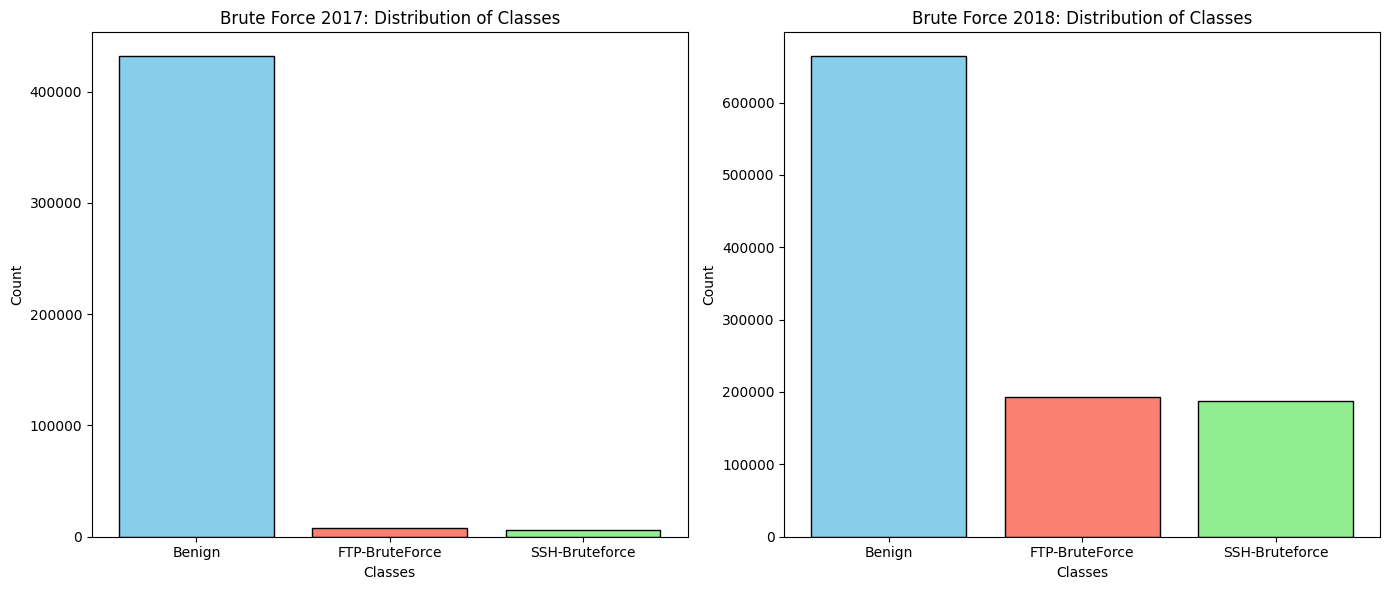

In [17]:
plot_paired_class_distributions(
    brute_force_2017_df, brute_force_2018_df,
    ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'],
    'Brute Force 2017: Distribution of Classes',
    'Brute Force 2018: Distribution of Classes'
)

These bar plots are showing the distribution of Benign, FTP-BruteForce, and SSH-BruteForce traffic for datasets from 2017 and 2018. In 2017, Benign traffic dominated the dataset, with very few instances of FTP and SSH brute force attacks. By 2018, the distribution becomes more balanced, with a noticeable increase in both FTP-BruteForce and SSH-BruteForce traffic, although Benign traffic still constitutes the majority. This suggests that there could be an increase in brute force attacks in 2018, or they made more of an active effort to collect less benign data.

### **DDoS**

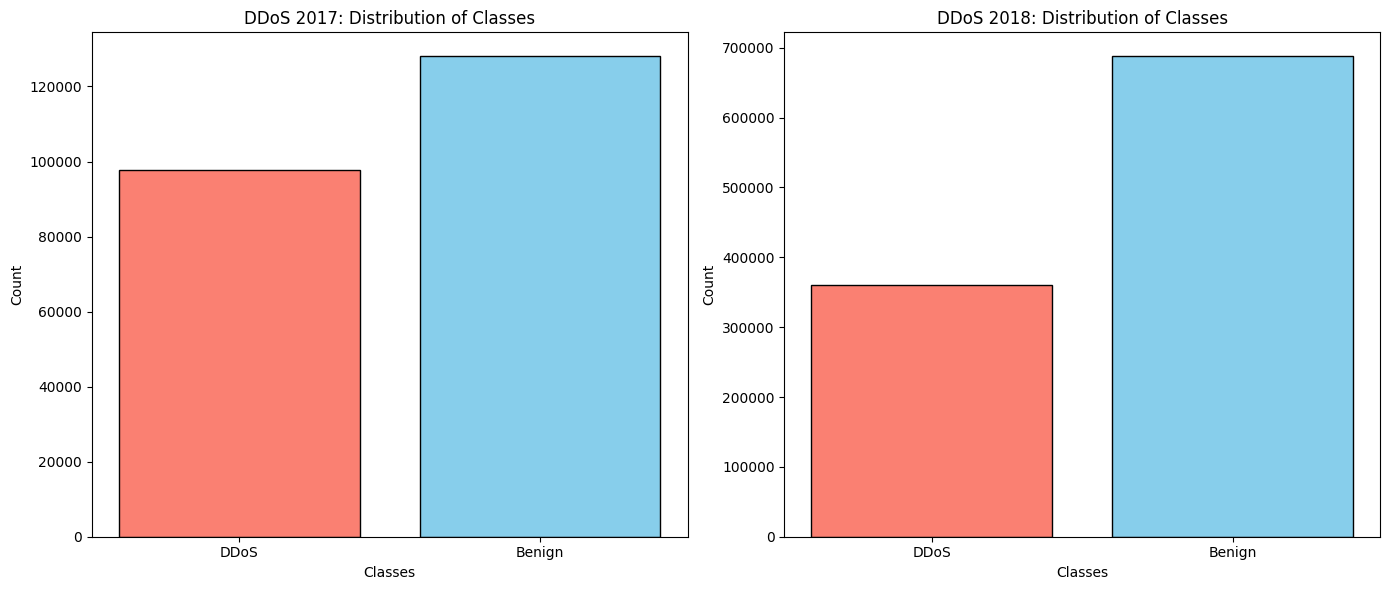

In [18]:
plot_paired_class_distributions(
    ddos_2017_df, ddos_2018_df,
    ['Benign', 'DDoS'],
    'DDoS 2017: Distribution of Classes',
    'DDoS 2018: Distribution of Classes'
)

These bar plots are showing the distribution of DDoS and Benign traffic in the 2017 and 2018 datasets. In 2017, there seems to be an imbalance with more Benign traffic compared to DDoS traffic, though the gap isn’t as significant as in some other datasets. By 2018, the imbalance becomes much more pronounced, with Benign traffic far outweighing DDoS traffic. This most likely suggests that either fewer DDoS attacks were recorded in 2018, or the collection process favored capturing more Benign traffic.

### **DoS**

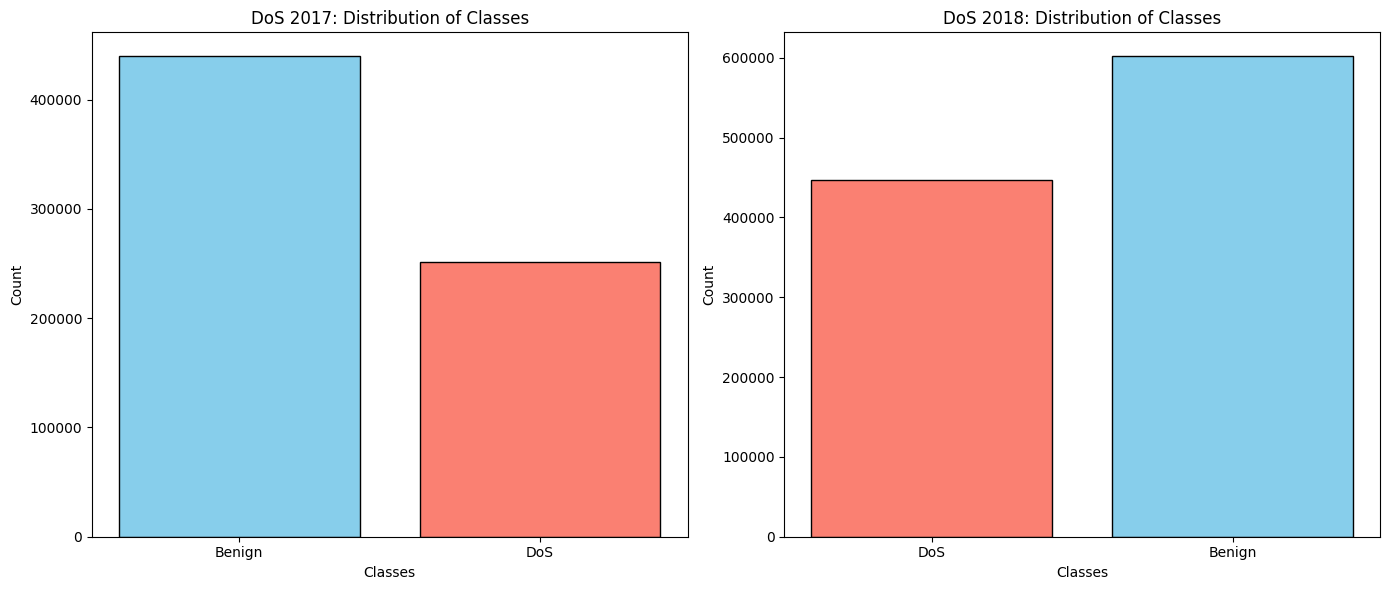

In [19]:
plot_paired_class_distributions(
    dos_2017_df, dos_2018_df,
    ['Benign', 'DoS'],
    'DoS 2017: Distribution of Classes',
    'DoS 2018: Distribution of Classes'
)

These bar plots are showing the distribution of Benign and DoS traffic for datasets from 2017 and 2018. In 2017, there’s a clear imbalance, with much more Benign traffic than DoS traffic. However, in 2018, the trend reverses, with DoS traffic being more frequent than Benign traffic. This change reflects either an increase in DoS attack activity or differences in how the data was collected.

### **Packet Totals**

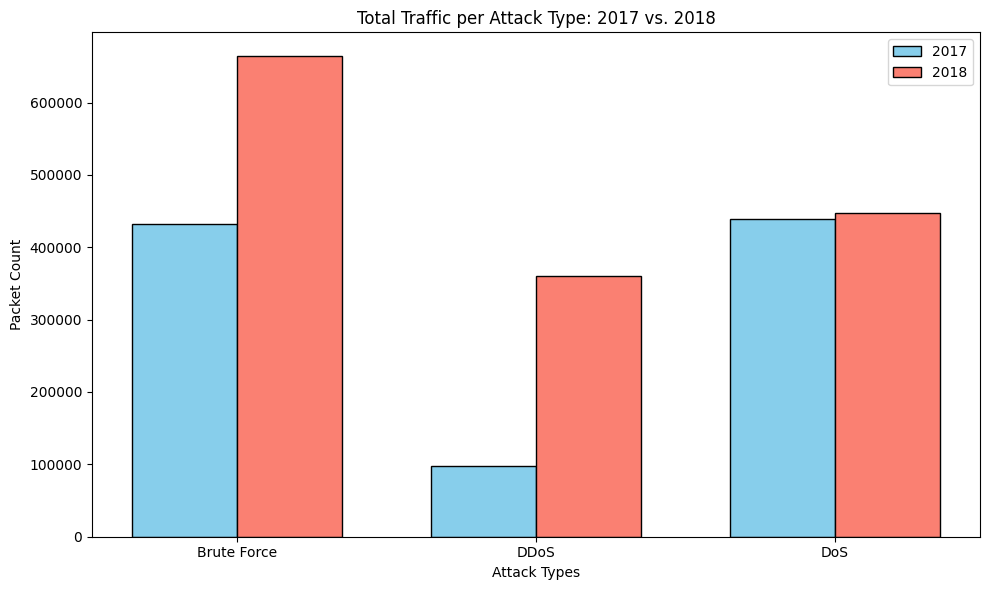

In [20]:
plot_comparative_bar_chart(
    [brute_force_2017.get(0, 0), ddos_2017.get(0, 0), dos_2017.get(0, 0)], 
    [brute_force_2018.get(0, 0), ddos_2018.get(0, 0), dos_2018.get(0, 0)], 
    ['Brute Force', 'DDoS', 'DoS'], 
    'Total Traffic per Attack Type: 2017 vs. 2018'
)

This bar plot is comparing the total traffic for Brute Force, DDoS, and DoS attacks in 2017 and 2018. For Brute Force attacks, there’s a noticeable increase in traffic in 2018 compared to 2017, reflecting either a rise in attack activity or enhanced data collection. In contrast, DDoS traffic shows a dramatic increase from 2017 to 2018, suggesting either a surge in attack frequency or improved identification and recording of these events. DoS traffic remains relatively consistent across the two years, with only a minor increase in 2018.

<!-- exclude -->
## **Model Helper Functions**

In [21]:
#exclude
def plot_roc_curve(y_test, y_pred_prob, class_names):
    """
    Plots the ROC curve for each class.

    Parameters:
    y_test : Series or array : True labels.
    y_pred_prob : Array : Predicted probabilities for each class.
    class_names : list : List of class names.
    """
    # Convert y_test to numpy array and binarize
    y_test_array = np.array(y_test)
    y_test_bin = label_binarize(y_test_array, classes=np.unique(y_test_array))
    
    # Handle cases where label_binarize outputs only one column
    if y_test_bin.shape[1] == 1:
        y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])
        
    # Ensure binarized labels and predicted probabilities match in dimensions
    assert y_test_bin.shape[1] == y_pred_prob.shape[1], (
        f"Mismatch in the number of classes: "
        f"y_test_bin has {y_test_bin.shape[1]}, y_pred_prob has {y_pred_prob.shape[1]}"
    )
    
    # Initialize the plot
    plt.figure(figsize=(10, 8))
    
    # Compute and plot the ROC curve for each class
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    
    # Plot the "No Skill" line (diagonal line)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='No Skill')
    
    # Add title, labels, and legend
    plt.title('ROC Curve', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc='lower right', fontsize=14)
    
    # Add grid and adjust layout
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

def generate_classification_report(y_test, y_pred, class_names):
    """
    Generates and returns a classification report.
    
    Parameters:
    y_test : Series : True labels.
    y_pred : Array : Predicted labels.
    class_names : list : List of class names.
    
    Returns:
    report_df : DataFrame : The classification report as a DataFrame.
    """
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df.index = class_names + ['Accuracy', 'Macro avg', 'Weighted avg']
    return report_df

def plot_confusion_matrix(y_test, y_pred, class_names):
    """
    Plots the confusion matrix using matplotlib.
    
    Parameters:
    y_test : Series : True labels.
    y_pred : Array : Predicted labels.
    class_names : list : List of class names.
    """
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(cm, cmap='Blues')
    fig.colorbar(cax)
    ax.set_title('Confusion Matrix', fontsize=18)
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    for (i, j), value in np.ndenumerate(cm):
        ax.text(j, i, f'{value}', ha='center', va='center', color='black', fontsize=16)

    plt.tight_layout()
    plt.show()

# Initialize a list to store metrics
metrics_list = []

def collect_metrics(report, attack_type, model_type):
    """
    Extracts key metrics from a classification report and appends attack and model type for comparison.
    
    Parameters:
    report : DataFrame : The classification report for a model on 2018 data.
    attack_type : str : The type of attack (e.g., "DoS").
    model_type : str : The type of model (e.g., "Naive Bayes").
    
    Returns:
    DataFrame : A DataFrame with metrics and attack/model information.
    """
    metrics = report.loc['Weighted avg', ['precision', 'recall', 'f1-score']]
    metrics['Accuracy'] = report.loc['Accuracy']
    metrics['attack_type'] = attack_type
    metrics['model_type'] = model_type
    return metrics

# Initialize 3 variables for the feature importances
brute_workflow = None
ddos_workflow = None
dos_workflow = None

# **Logistic Regression**
---

Logistic regression is a statistical and machine learning algorithm used for binary and multi-class classification problems. It predicts the probability of an event belonging to a particular class by applying the logistic (sigmoid) function to a linear combination of input features. The sigmoid function ensures the output is a value between 0 and 1, which can be interpreted as a probability. Logistic regression is particularly effective for understanding the influence of independent variables on a binary dependent variable, making it a popular choice for tasks where the output involves two or more discrete classes. Its interpretability, simplicity, and ability to handle large datasets make it a practical model for identifying patterns in data associated with network attacks.

In the context of brute force, DDoS, and DoS attacks, logistic regression is especially useful due to its capacity to differentiate between normal and malicious network traffic based on key features like traffic volume, frequency of connection attempts, and packet characteristics. For brute force attacks, logistic regression can identify suspicious login attempts by analyzing patterns such as repeated access failures or unusually rapid login attempts. In the case of DDoS and DoS attacks, it can classify traffic based on abnormal volumes or irregular request patterns. Its efficiency in training and prediction makes it ideal for real-time detection systems, where quick decisions are crucial to mitigate the impact of these attacks. Moreover, the model’s ability to provide probabilistic outputs allows security teams to set thresholds for alerts and prioritize responses to the most severe threats.

## **Logistic Regression Class Structure**

In [22]:
#exclude
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class LogisticRegressionWorkflow:
    def __init__(self, X, y, class_names):
        """
        Initializes the workflow with data and class names.
        
        Parameters:
        X : DataFrame : The feature data.
        y : Series : The target labels.
        class_names : list : List of class names.
        """
        self.X = X
        self.y = y
        self.class_names = class_names
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.best_model = None
        self.model = None
        self.y_pred = None
        self.y_pred_prob = None
        self.y_pred_new = None
        self.y_pred_prob_new = None
        self.report_df = None

    def train(self):
        """
        Splits the data, trains the model using GridSearchCV, and stores the best model.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression(random_state=42, max_iter=1000))
        ])

        param_grid = {
            'logreg__C': [0.1, 10],
            'logreg__solver': ['lbfgs', 'liblinear']
        }

        grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(self.X_train, self.y_train)

        self.best_model = grid_search.best_estimator_
        self.model = self.best_model

    def predict(self):
        """
        Generates predictions for the test set and stores them as attributes.
        """
        if self.model is None:
            raise ValueError("The model is not trained. Run the train() method first.")

        self.y_pred = self.model.predict(self.X_test)
        self.y_pred_prob = self.model.predict_proba(self.X_test)

    def evaluate(self):
        """
        Generates the classification report and stores it as an attribute.
        """
        if self.y_test is None or self.y_pred is None:
            raise ValueError("Predictions have not been made. Ensure the model is trained and predictions are generated before evaluation.")

        self.report_df = generate_classification_report(self.y_test, self.y_pred, self.class_names)

    def plot_feature_importance(self):
        """
        Plots the feature importance based on the coefficients of the logistic regression model.
        """
        coefficients = self.best_model.named_steps['logreg'].coef_[0]
        feature_names = self.X.columns
        importance = np.abs(coefficients)
        sorted_idx = importance.argsort()

        plt.figure(figsize=(10, 16))
        plt.barh(range(len(importance)), importance[sorted_idx], align='center', color='purple')
        plt.yticks(range(len(importance)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Absolute Coefficient Value')
        plt.title('Feature Importances Based on Logistic Regression Coefficients')
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self):
        """
        Plots the confusion matrix for the test data.
        """
        plot_confusion_matrix(self.y_test, self.y_pred, self.class_names)

    def plot_roc_curve(self):
        """
        Plots the ROC curve for the test data.
        """
        plot_roc_curve(self.y_test, self.y_pred_prob, self.class_names)

    def predict_on_new_data(self, X_new, y_new):
        """
        Predicts the labels for new data and evaluates performance.
        
        Parameters:
        X_new : DataFrame : The new feature data (e.g., 2018 data).
        y_new : Series : The new target labels (e.g., 2018 labels).
        
        Returns:
        report_df : DataFrame : The classification report for the new data.
        """
        self.y_pred_new = self.best_model.predict(X_new)
        self.y_pred_prob_new = self.best_model.predict_proba(X_new)
        report_df = generate_classification_report(y_new, self.y_pred_new, self.class_names)
        return report_df

## **Brute Force**

### **2017 Data + Predictions**

In [24]:
#exclude
class_names = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']  # Adjust this based on the dataset
X = brute_force_2017_df.drop(columns=['Label'])
y = brute_force_2017_df['Label']

# Initialize the workflow for 2017 data
workflow_2017 = LogisticRegressionWorkflow(X, y, class_names)

# Train the model and evaluate it on 2017 data
workflow_2017.train()
workflow_2017.predict()
workflow_2017.evaluate()

metrics_df = collect_metrics(workflow_2017.report_df, 'Brute Force', 'Logistic Regression')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=  12.5s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=  12.7s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=  14.5s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  16.2s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  19.7s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  20.6s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  25.4s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  26.9s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  26.9s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=  51.8s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=  53.3s
[CV] END .............logreg__C=10, logreg__solve

##### **Classification Report**

In [25]:
workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.992599,0.999119,0.995848,86310.000000
FTP-BruteForce,0.967584,0.996849,0.981999,1587.000000
SSH-Bruteforce,0.956240,0.478896,0.638183,1232.000000
Accuracy,0.991888,0.991888,0.991888,0.991888
Macro avg,0.972141,0.824955,0.872010,89129.000000
Weighted avg,0.991651,0.991888,0.990658,89129.000000


##### **Confusion Matrix**

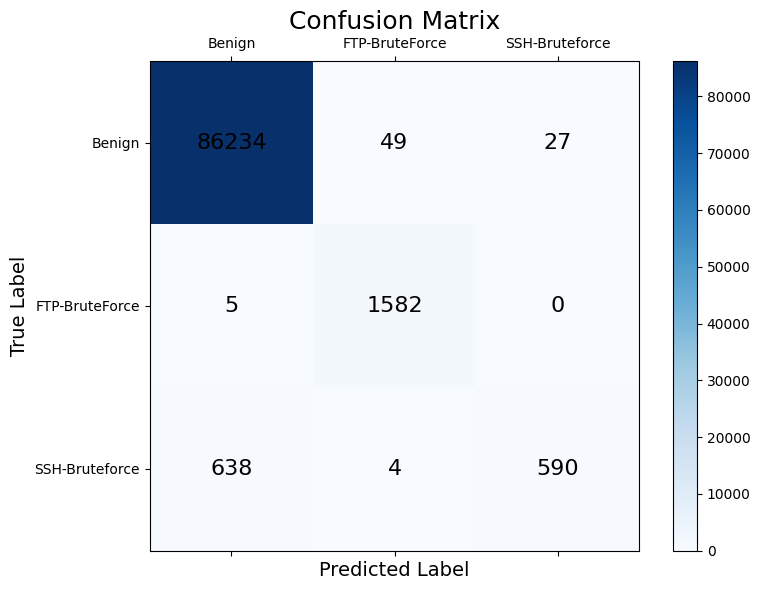

In [26]:
workflow_2017.plot_confusion_matrix()

##### **ROC Curve**

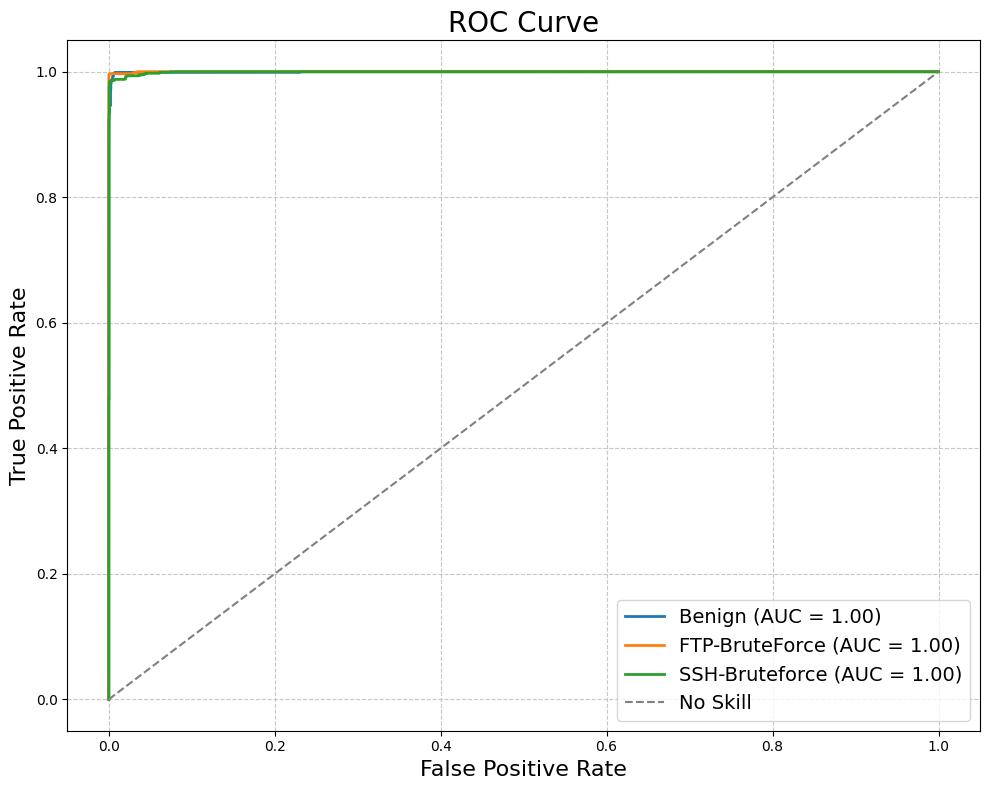

In [27]:
workflow_2017.plot_roc_curve()

### **2018 Data + Predictions**

In [28]:
#exclude
class_names = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'] 
X = brute_force_2018_df.drop(columns=['Label'])
y = brute_force_2018_df['Label']

# Initialize the workflow for 2018 data
workflow_2018 = LogisticRegressionWorkflow(X, y, class_names)

# Train and evaluate the model
workflow_2018.train()
workflow_2018.predict()
workflow_2018.evaluate()

brute_workflow = workflow_2018

metrics_df = collect_metrics(workflow_2018.report_df, 'Brute Force', 'Logistic Regression')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  10.9s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=  11.1s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=  11.6s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  11.6s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  11.9s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=  16.5s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time= 1.0min
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time= 1.2min
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time= 1.2min
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time= 1.6min
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time= 1.9min
[CV] END .............logreg__C=10, logreg__solve

##### **Classification Report**

In [29]:
workflow_2018.report_df

,precision,recall,f1-score,support
Benign,0.999992,0.999857,0.999925,132745.000000
FTP-BruteForce,0.999330,1.000000,0.999665,38753.000000
SSH-Bruteforce,0.999920,0.999706,0.999813,37453.000000
Accuracy,0.999856,0.999856,0.999856,0.999856
Macro avg,0.999747,0.999854,0.999801,208951.000000
Weighted avg,0.999857,0.999856,0.999856,208951.000000


##### **Confusion Matrix**

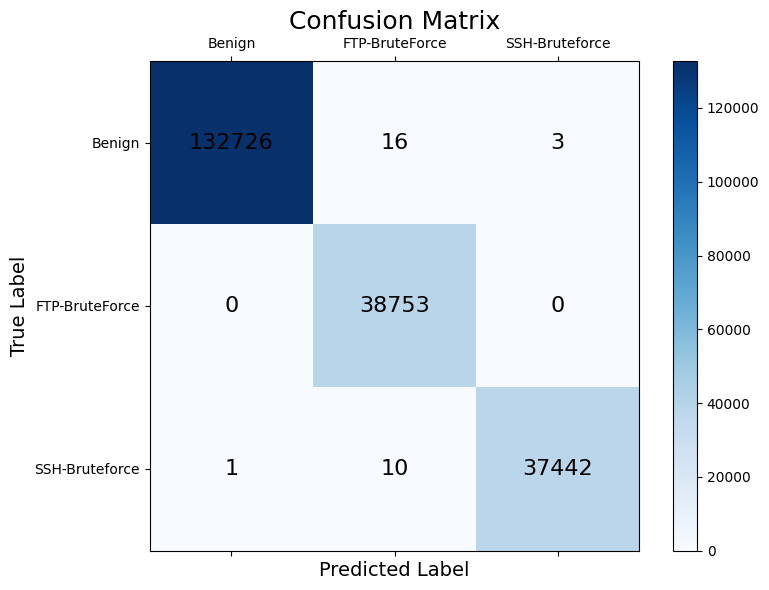

In [30]:
workflow_2018.plot_confusion_matrix()

##### **ROC Curve**

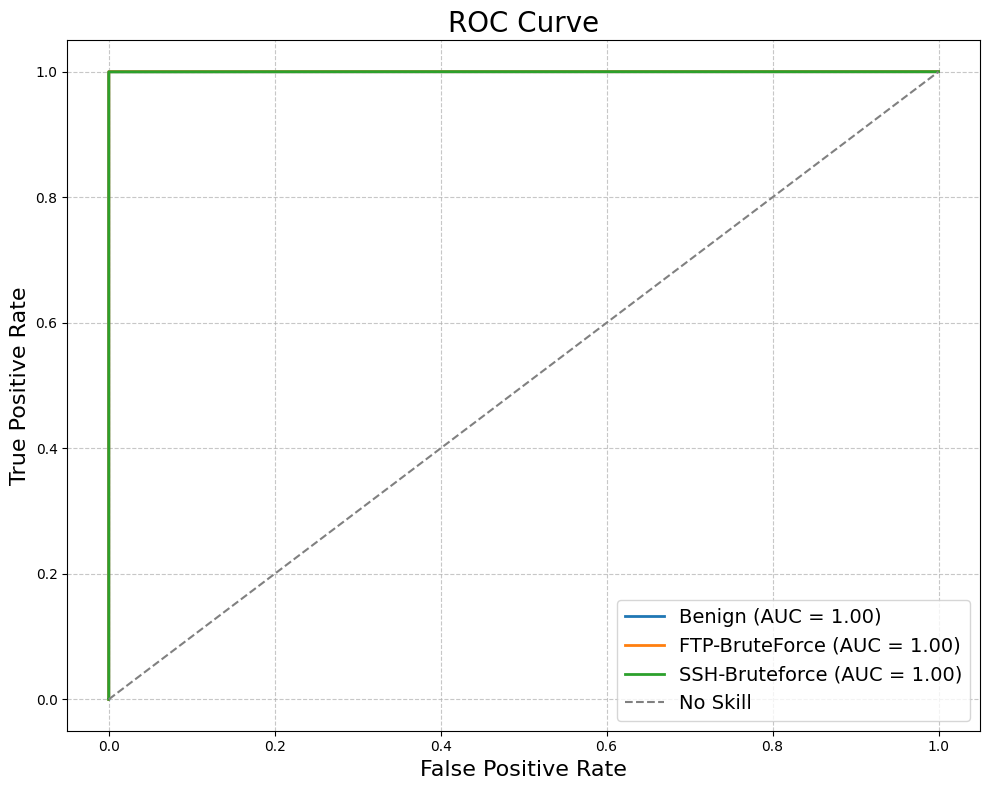

In [31]:
workflow_2018.plot_roc_curve()

## **DDoS**

### **2017 Data + Predictions**

In [32]:
#exclude
# Define class names
class_names = ['Benign', 'DDoS'] 

# 2017 Data
X_2017 = ddos_2017_df.drop(columns=['Label'])
y_2017 = ddos_2017_df['Label']

# Initialize and train the workflow for 2017 data
workflow_2017 = LogisticRegressionWorkflow(X_2017, y_2017, class_names)
workflow_2017.train()
workflow_2017.predict()
workflow_2017.evaluate()

metrics_df = collect_metrics(workflow_2017.report_df, 'DDoS', 'Logistic Regression')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   0.8s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   0.8s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   0.8s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   1.5s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   2.0s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   2.1s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=   3.7s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=   4.1s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=   4.1s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=   7.8s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=   9.6s
[CV] END .............logreg__C=10, logreg__solve

##### **Classification Report**

In [33]:
workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.998353,0.999022,0.998687,19419.00000
DDoS,0.999261,0.998756,0.999008,25724.00000
Accuracy,0.998870,0.998870,0.998870,0.99887
Macro avg,0.998807,0.998889,0.998848,45143.00000
Weighted avg,0.998871,0.998870,0.998870,45143.00000


##### **Confusion Matrix**

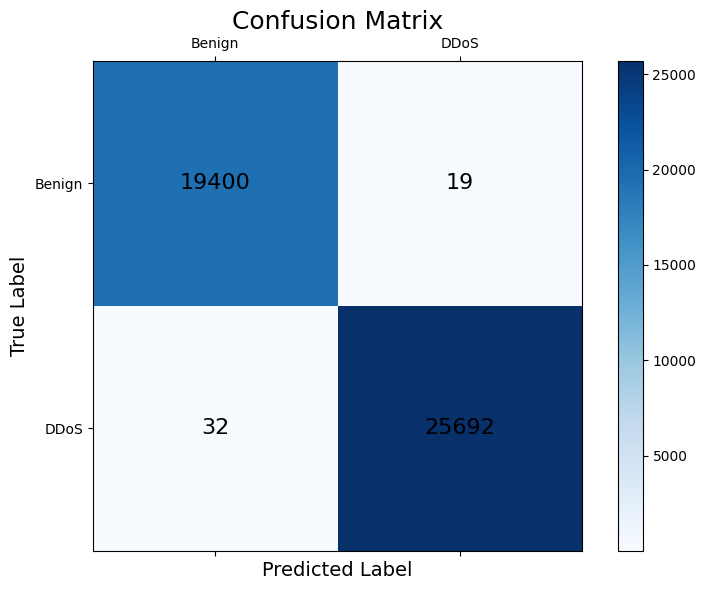

In [34]:
workflow_2017.plot_confusion_matrix()

##### **ROC Curve**

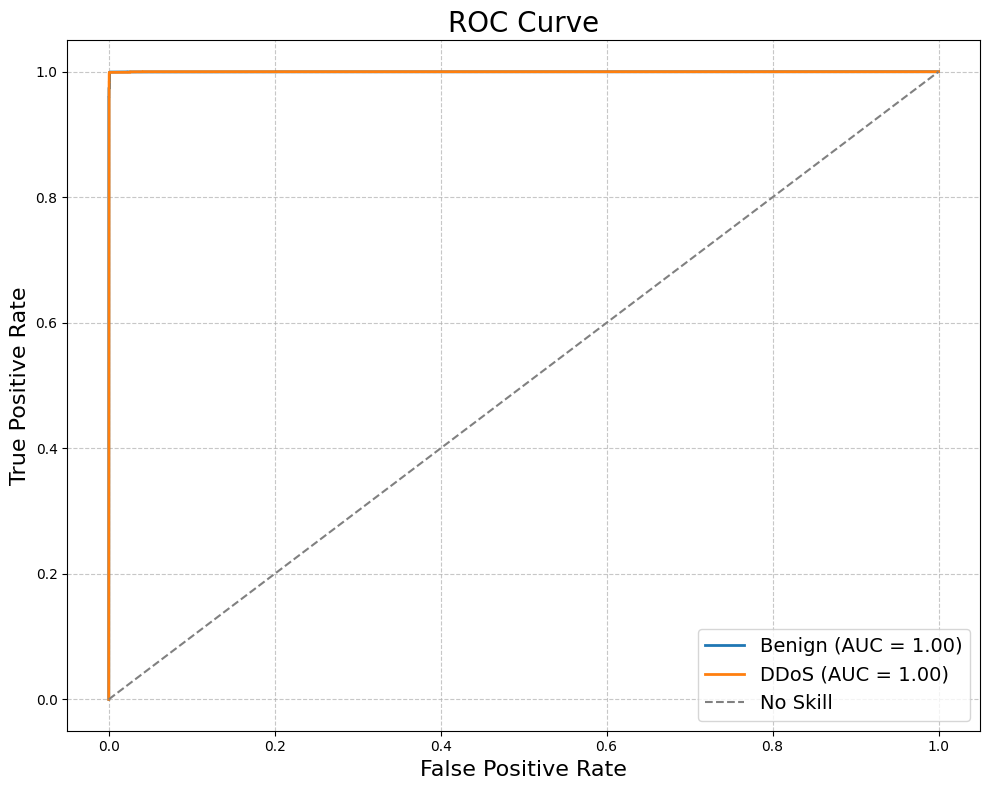

In [35]:
workflow_2017.plot_roc_curve()

### **2018 Data + Predictions**

In [36]:
#exclude
# 2018 Data
X_2018 = ddos_2018_df.drop(columns=['Label', 'Protocol'])  # Drop Protocol earlier during the data cleaning stage
y_2018 = ddos_2018_df['Label']

# Initialize a new workflow for 2018 data and retrain the model
workflow_2018 = LogisticRegressionWorkflow(X_2018, y_2018, class_names)
workflow_2018.train()
workflow_2018.predict()
workflow_2018.evaluate() 

ddos_workflow = workflow_2018

# Collect metrics for 2018 data
metrics_df = collect_metrics(workflow_2018.report_df, 'DDoS', 'Logistic Regression')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   4.3s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   4.2s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   4.7s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   5.7s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   4.8s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   4.8s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  12.0s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=  12.1s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=  12.4s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  12.8s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  12.9s
[CV] END .............logreg__C=10, logreg__solve

##### **Classification Report**

In [37]:
workflow_2018.report_df

,precision,recall,f1-score,support
Benign,1.000000,0.999986,0.999993,72083.000000
DDoS,0.999993,1.000000,0.999996,137632.000000
Accuracy,0.999995,0.999995,0.999995,0.999995
Macro avg,0.999996,0.999993,0.999995,209715.000000
Weighted avg,0.999995,0.999995,0.999995,209715.000000


##### **Confusion Matrix**

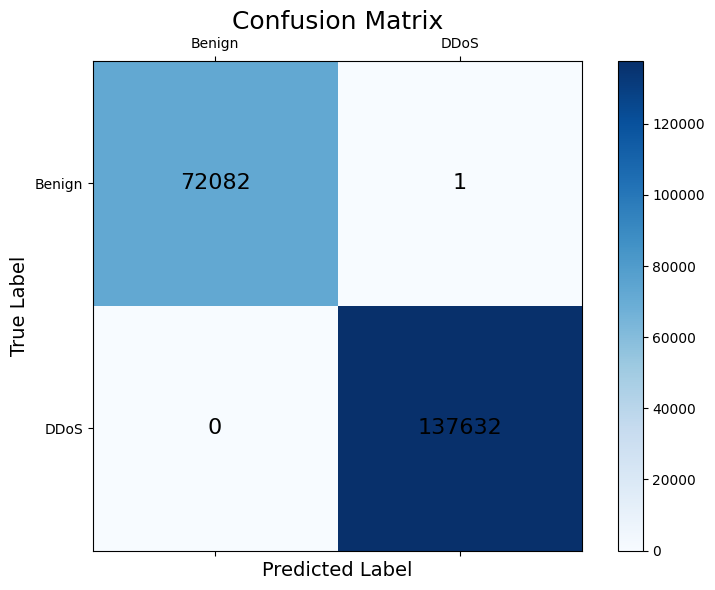

In [38]:
workflow_2018.plot_confusion_matrix()

##### **ROC Curve**

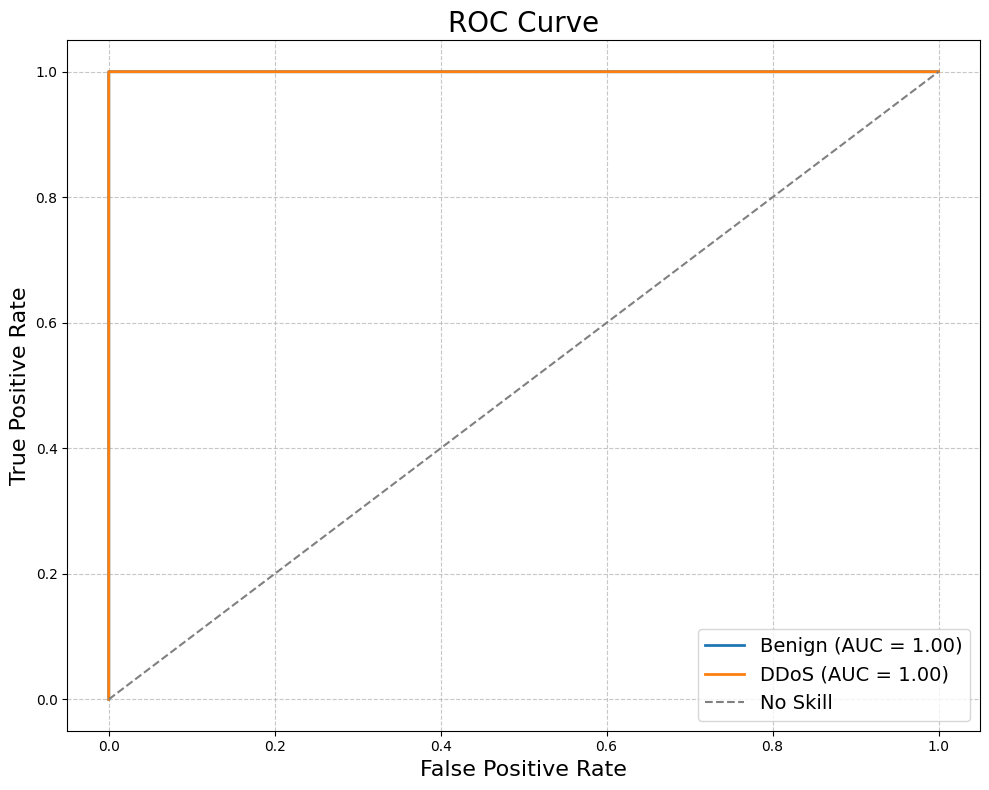

In [39]:
workflow_2018.plot_roc_curve()

## **DoS**

### **2017 Data + Predictions**

In [40]:
#exclude
class_names = ['Benign', 'DoS'] 

X_2017 = dos_2017_df.drop(columns=['Label'])
y_2017 = dos_2017_df['Label']

workflow_2017 = LogisticRegressionWorkflow(X_2017, y_2017, class_names)
workflow_2017.train()
workflow_2017.predict()
workflow_2017.evaluate()

metrics_df = collect_metrics(workflow_2017.report_df, 'DoS', 'Logistic Regression')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   5.8s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   6.0s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   6.4s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  16.3s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  19.2s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=  20.9s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  30.5s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  37.8s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=  42.1s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time= 3.5min


/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .............logreg__C=10, logreg__solver=liblinear; total time= 4.2min


/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .............logreg__C=10, logreg__solver=liblinear; total time= 4.8min


##### **Classification Report**

In [41]:
workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.992768,0.994527,0.993647,88068.0000
DoS,0.990371,0.987294,0.988830,50211.0000
Accuracy,0.991900,0.991900,0.991900,0.9919
Macro avg,0.991570,0.990910,0.991238,138279.0000
Weighted avg,0.991898,0.991900,0.991898,138279.0000


##### **Confusion Matrix**

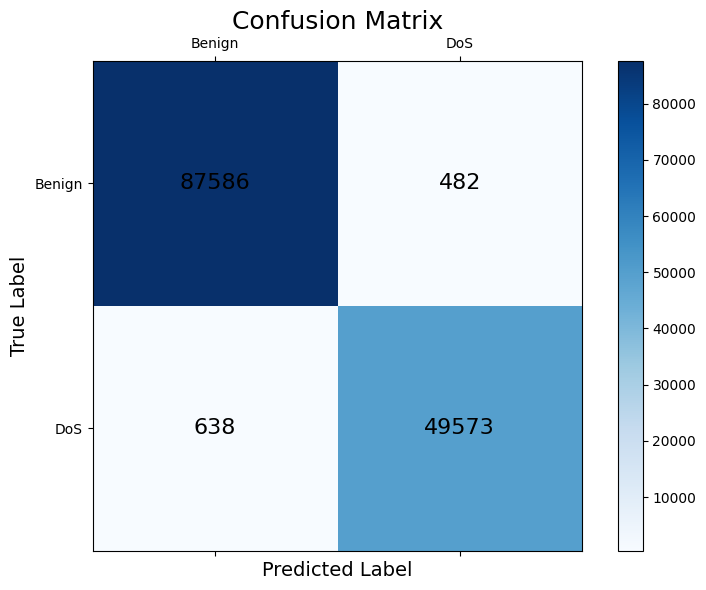

In [42]:
workflow_2017.plot_confusion_matrix()

##### **ROC Curve**

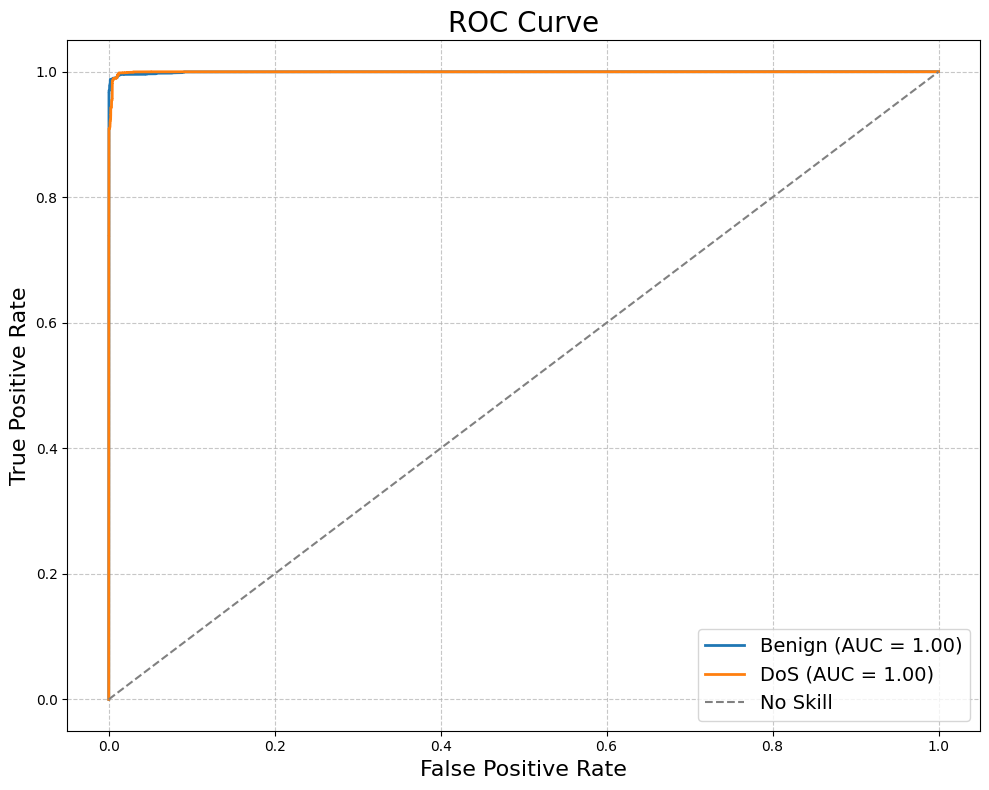

In [43]:
workflow_2017.plot_roc_curve()

### **2018 Data + Predictions**

In [44]:
#exclude
X_2018 = dos_2018_df.drop(columns=['Label', 'Protocol'])
y_2018 = dos_2018_df['Label']

workflow_2018 = LogisticRegressionWorkflow(X_2018, y_2018, class_names)
workflow_2018.train()
workflow_2018.predict() 
workflow_2018.evaluate() 

dos_workflow = workflow_2018

metrics_df = collect_metrics(workflow_2018.report_df, 'DoS', 'Logistic Regression')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   2.5s


/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   2.7s
[CV] END ................logreg__C=0.1, logreg__solver=lbfgs; total time=   2.6s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=   7.7s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=   8.7s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   2.8s
[CV] END ............logreg__C=0.1, logreg__solver=liblinear; total time=   7.7s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   2.7s
[CV] END .................logreg__C=10, logreg__solver=lbfgs; total time=   2.6s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=   8.2s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=   8.3s
[CV] END .............logreg__C=10, logreg__solver=liblinear; total time=   7.8s


##### **Classification Report**

In [45]:
workflow_2018.report_df

,precision,recall,f1-score,support
Benign,1.000000,0.999989,0.999994,89389.000000
DoS,0.999992,1.000000,0.999996,120326.000000
Accuracy,0.999995,0.999995,0.999995,0.999995
Macro avg,0.999996,0.999994,0.999995,209715.000000
Weighted avg,0.999995,0.999995,0.999995,209715.000000


##### **Confusion Matrix**

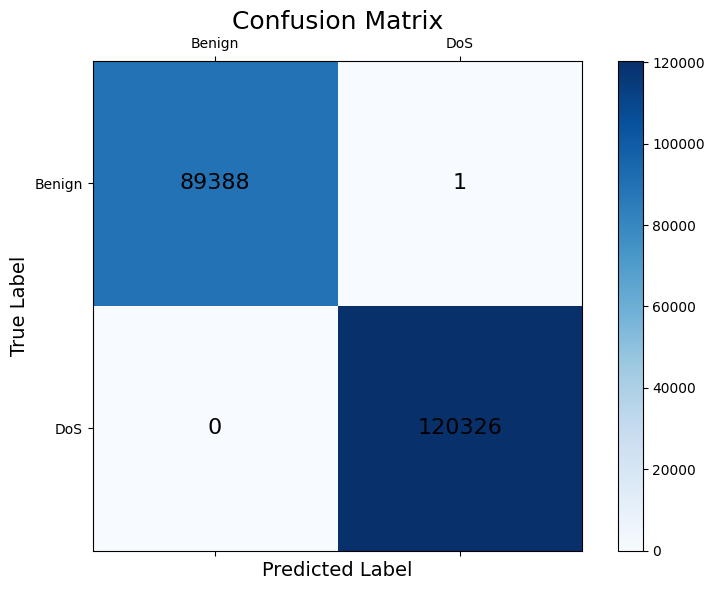

In [46]:
workflow_2018.plot_confusion_matrix()

##### **ROC Curve**

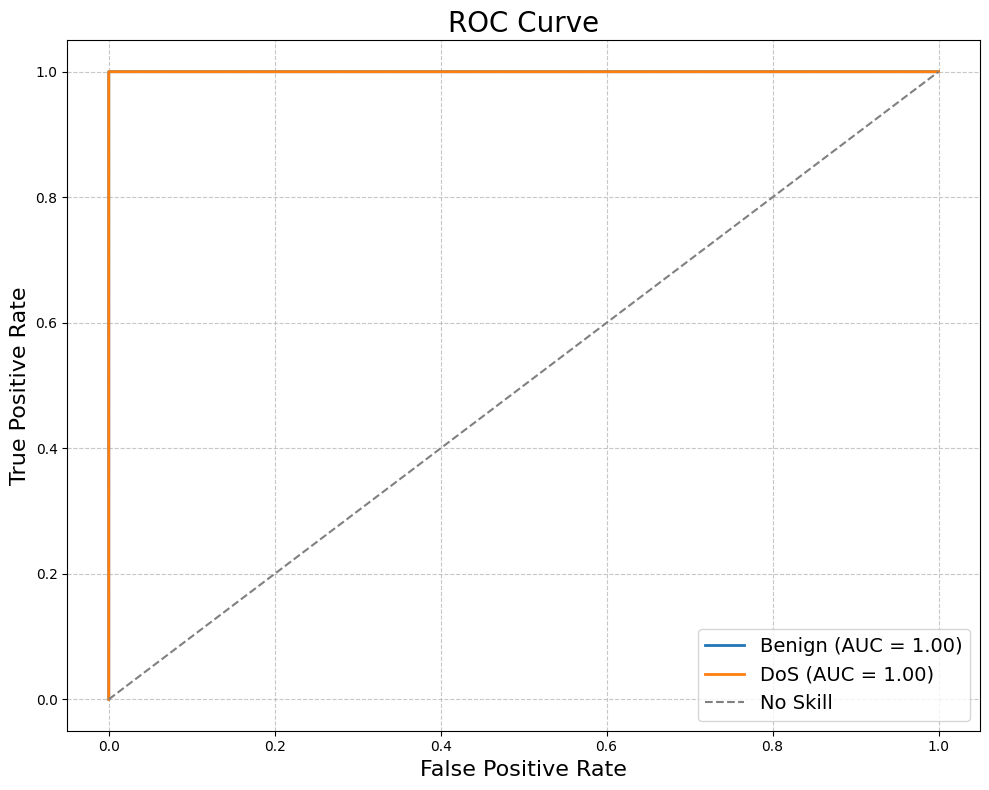

In [47]:
workflow_2018.plot_roc_curve()

# **Random Forest**
---

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees during training and combines their outputs to improve classification or regression performance. Each tree in the forest is constructed using a random subset of the data and features, which introduces diversity and helps reduce overfitting. The final prediction is typically determined by averaging the outputs (in regression tasks) or by majority voting (in classification tasks). Random Forest is robust, can handle both categorical and numerical data, and is less sensitive to noise or outliers compared to individual decision trees. Its ability to rank feature importance also makes it valuable for identifying key variables contributing to a classification.

For detecting brute force, DDoS, and DoS attacks, Random Forest is particularly useful due to its flexibility and capability to model complex relationships between input features. In the case of brute force attacks, Random Forest can analyze intricate patterns such as repeated login attempts across multiple accounts or IP addresses, even if the data contains noise. For DDoS and DoS attacks, it excels at identifying anomalies in high-dimensional datasets, such as spikes in traffic volume, unusual packet sizes, or irregular request timings. Since it evaluates multiple decision trees, Random Forest provides a more reliable and accurate classification of network traffic, reducing the likelihood of false positives or negatives.

## **Random Forest Class Structure**

In [48]:
#exclude
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd

In [49]:
class RandomForestWorkflow:
    """
    A class to manage the workflow of training, evaluating, and predicting with a Random Forest model.
    """

    def __init__(self, X, y, class_names):
        """
        Initialize the workflow with data and class names.

        Parameters:
        X : DataFrame : The feature data.
        y : Series : The target labels.
        class_names : list : List of class names.
        """
        self.X = X
        self.y = y
        self.class_names = class_names
        self.best_model = None
        self.report_df = None
        self.y_pred = None
        self.y_pred_prob = None

    def train(self, test_size=0.2, random_state=42):
        """
        Train the Random Forest model with hyperparameter tuning.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        self.best_model = self._tune_hyperparameters()

    def evaluate(self):
        """
        Evaluate the model on the test set and generate performance metrics.
        """
        if not self.best_model:
            raise ValueError("Model has not been trained. Call the train() method first.")

        self.y_pred = self.best_model.predict(self.X_test)
        self.y_pred_prob = self.best_model.predict_proba(self.X_test)
        self.report_df = self._generate_classification_report(self.y_test, self.y_pred)

    def predict_on_new_data(self, X_new, y_new):
        """
        Predict on new data using the trained model.

        Parameters:
        X_new : DataFrame : New feature data.
        y_new : Series : New target labels.

        Returns:
        DataFrame : Classification report for the new data.
        """
        if not self.best_model:
            raise ValueError("Model has not been trained. Call the train() method first.")

        self.y_new_pred = self.best_model.predict(X_new)
        self.y_new_pred_prob = self.best_model.predict_proba(X_new)
        return self._generate_classification_report(y_new, self.y_new_pred)

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot a confusion matrix.

        Parameters:
        y_true : Series : True labels.
        y_pred : Series : Predicted labels.
        """
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(self.class_names))
        plt.xticks(tick_marks, self.class_names, rotation=45)
        plt.yticks(tick_marks, self.class_names)

        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, f"{cm[i, j]}", horizontalalignment="center",
                         color="white" if cm[i, j] > cm.max() / 2. else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    def plot_roc_curve(self, y_true, y_pred_prob):
        """
        Plot ROC curve and AUC for binary or multiclass classification.

        Parameters:
        y_true : array-like : True labels.
        y_pred_prob : ndarray : Predicted probabilities for each class.
        """
        plt.figure(figsize=(10, 8))
        n_classes = len(self.class_names)

        if n_classes == 2:
            fpr, tpr, _ = roc_curve(y_true, y_pred_prob[:, 1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="darkorange")
        else: 
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_true == i, y_pred_prob[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f"Class {self.class_names[i]} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    def _tune_hyperparameters(self):
        """
        Tune hyperparameters using GridSearchCV.

        Returns:
        Best estimator from the GridSearchCV.
        """
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [None, 10],
            'min_samples_split': [2],
            'min_samples_leaf': [1],
            'bootstrap': [True]
        }
        grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(self.X_train, self.y_train)
        return grid_search.best_estimator_

    def _generate_classification_report(self, y_true, y_pred):
        """
        Generate a classification report.

        Parameters:
        y_true : Series : True labels.
        y_pred : Series : Predicted labels.

        Returns:
        DataFrame : Classification report as a DataFrame.
        """
        report = classification_report(y_true, y_pred, target_names=self.class_names, output_dict=True)
        return pd.DataFrame(report).transpose()
    
    def collect_metrics(report_df, model_type, algorithm):
      """
      Collect key metrics from the classification report DataFrame.
      """
      try:
          accuracy = report_df.loc['Accuracy', 'f1-score'] if 'Accuracy' in report_df.index else None
          macro_f1 = report_df.loc['Macro avg', 'f1-score'] if 'Macro avg' in report_df.index else None
          weighted_f1 = report_df.loc['Weighted avg', 'f1-score'] if 'Weighted avg' in report_df.index else None

          return pd.DataFrame([{
              'Model': model_type,
              'Algorithm': algorithm,
              'Accuracy': accuracy,
              'Macro F1': macro_f1,
              'Weighted F1': weighted_f1
          }])
      except KeyError as e:
          print(f"KeyError in collect_metrics: {e}")
          print("Available keys:", report_df.index)
          return pd.DataFrame([{
              'Model': model_type,
              'Algorithm': algorithm,
              'Accuracy': None,
              'Macro F1': None,
              'Weighted F1': None
          }])

## **Brute Force**

### **2017 Data + Predictions**

In [50]:
#exclude
class_names = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'] 

X_2017 = brute_force_2017_df.drop(columns=['Label'])
y_2017 = brute_force_2017_df['Label']

brute_force_workflow_2017 = RandomForestWorkflow(X_2017, y_2017, class_names)
brute_force_workflow_2017.train()
brute_force_workflow_2017.evaluate()

report_2017 = brute_force_workflow_2017.report_df
report_2017.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2017.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2017.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2017, 'Brute Force', 'Random Forest')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.9s


##### **Classification Report**

In [51]:
brute_force_workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.999942,1.000000,0.999971,86310.000000
FTP-BruteForce,1.000000,0.998740,0.999369,1587.000000
SSH-Bruteforce,1.000000,0.997565,0.998781,1232.000000
Accuracy,0.999944,0.999944,0.999944,0.999944
Macro avg,0.999981,0.998768,0.999374,89129.000000
Weighted avg,0.999944,0.999944,0.999944,89129.000000


##### **Confusion Matrix**

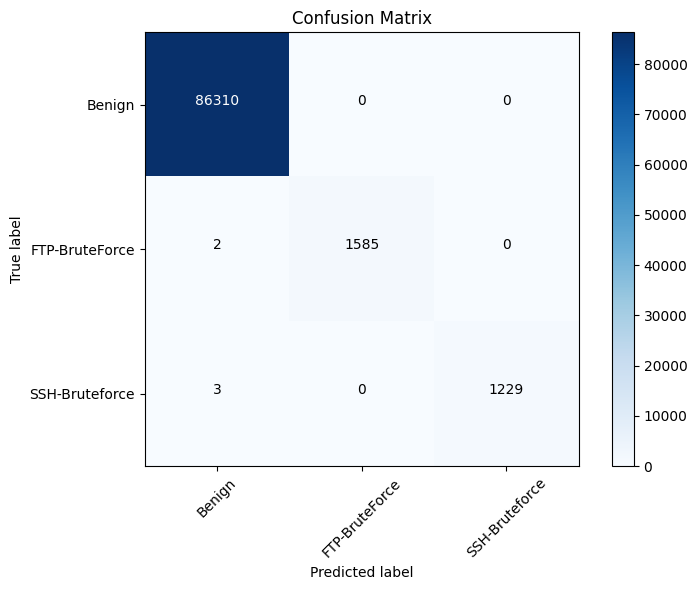

In [52]:
brute_force_workflow_2017.plot_confusion_matrix(
    brute_force_workflow_2017.y_test, brute_force_workflow_2017.y_pred
)

##### **ROC Curve**

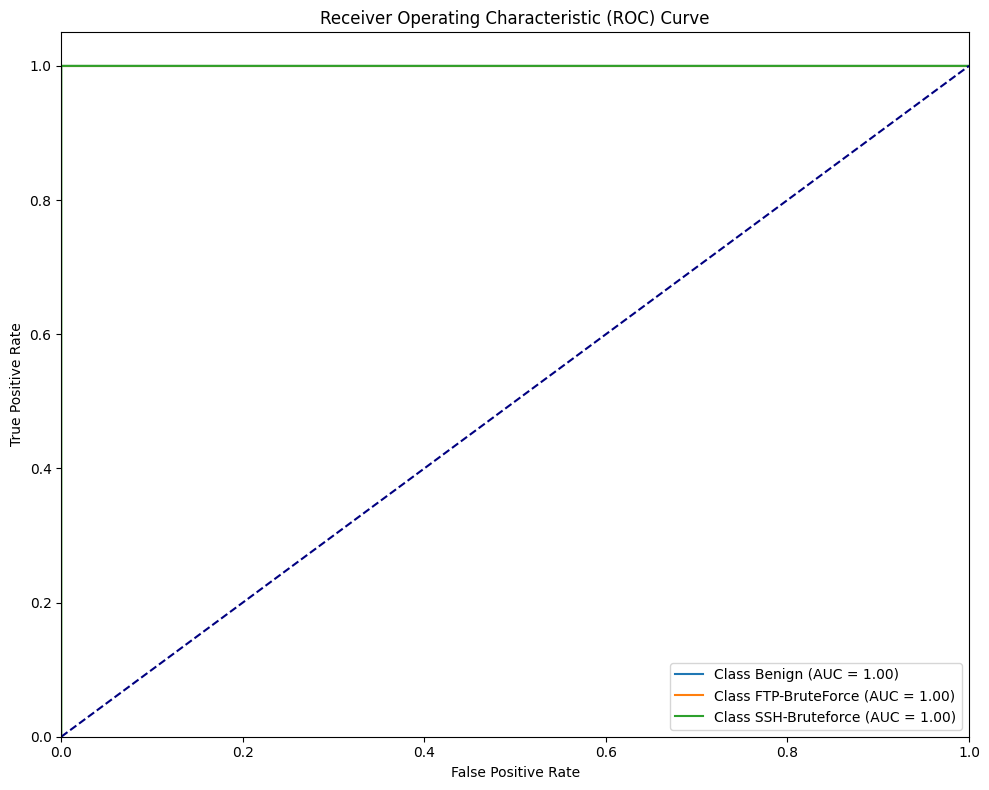

In [53]:
brute_force_workflow_2017.plot_roc_curve(
    brute_force_workflow_2017.y_test, brute_force_workflow_2017.y_pred_prob
)

### **2018 Data + Predictions**

In [54]:
#exclude
class_names = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']

X_2018 = brute_force_2018_df.drop(columns=['Label', 'Protocol'])
y_2018 = brute_force_2018_df['Label']

brute_force_workflow_2018 = RandomForestWorkflow(X_2018, y_2018, class_names)
brute_force_workflow_2018.train()
brute_force_workflow_2018.evaluate()

report_2018 = brute_force_workflow_2018.report_df

report_2018.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2018.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2018.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2018, 'Brute Force', 'Random Forest')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  33.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  34.3s
[C

##### **Classification Report**

In [55]:
brute_force_workflow_2018.report_df

,precision,recall,f1-score,support
Benign,1.000000,1.000000,1.000000,132745.000000
FTP-BruteForce,0.999742,1.000000,0.999871,38753.000000
SSH-Bruteforce,1.000000,0.999733,0.999866,37453.000000
Accuracy,0.999952,0.999952,0.999952,0.999952
Macro avg,0.999914,0.999911,0.999912,208951.000000
Weighted avg,0.999952,0.999952,0.999952,208951.000000


##### **Confusion Matrix**

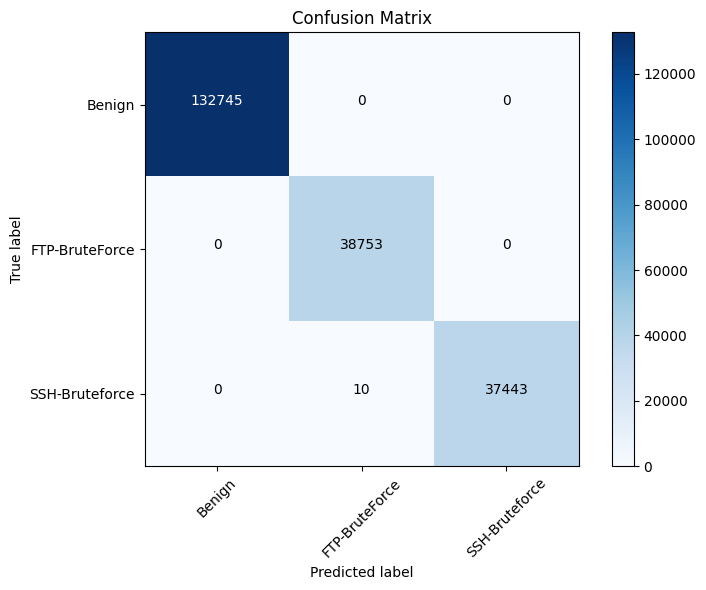

In [56]:
brute_force_workflow_2018.plot_confusion_matrix(
    brute_force_workflow_2018.y_test, brute_force_workflow_2018.y_pred
)

##### **ROC Curve**

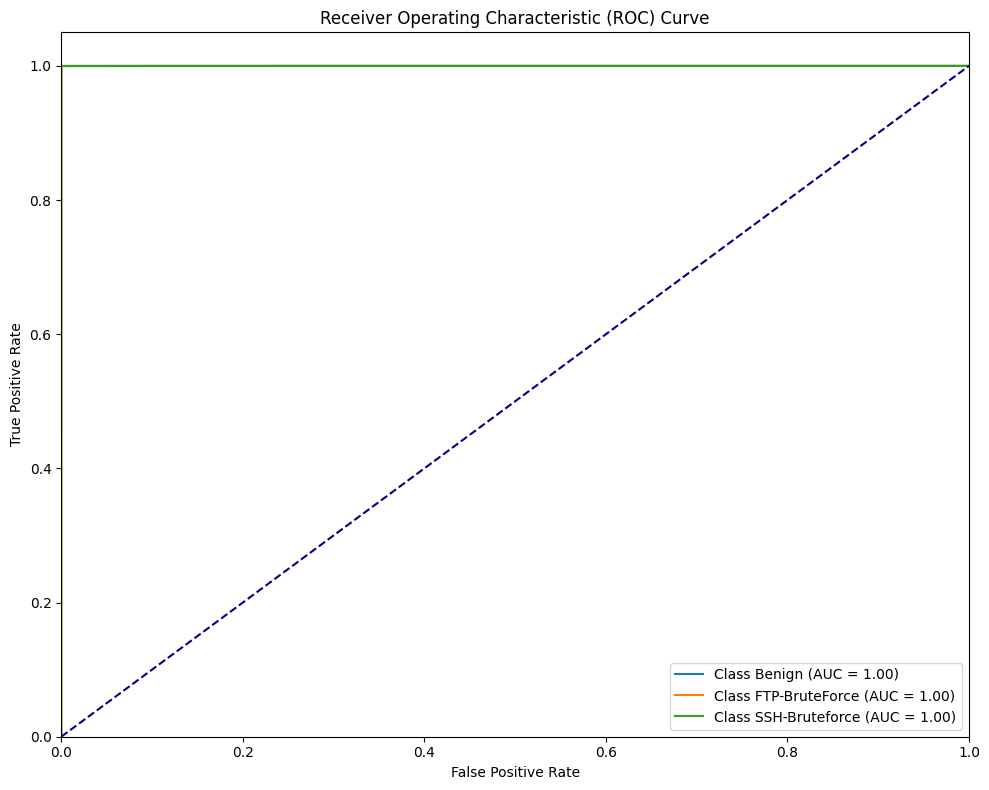

In [57]:
brute_force_workflow_2018.plot_roc_curve(
    brute_force_workflow_2018.y_test, brute_force_workflow_2018.y_pred_prob
)

## **DDoS**

### **2017 Data + Predictions**

In [58]:
#exclude
class_names = ['Benign', 'DDoS']

X_2017 = ddos_2017_df.drop(columns=['Label'])
y_2017 = ddos_2017_df['Label']

ddos_workflow_2017 = RandomForestWorkflow(X_2017, y_2017, class_names)
ddos_workflow_2017.train()
ddos_workflow_2017.evaluate()

report_2017 = ddos_workflow_2017.report_df
report_2017.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2017.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2017.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2017, 'DDoS', 'Random Forest')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.1s


##### **Classification Report**

In [59]:
ddos_workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.999794,1.000000,0.999897,19419.000000
DDoS,1.000000,0.999845,0.999922,25724.000000
Accuracy,0.999911,0.999911,0.999911,0.999911
Macro avg,0.999897,0.999922,0.999910,45143.000000
Weighted avg,0.999911,0.999911,0.999911,45143.000000


##### **Confusion Matrix**

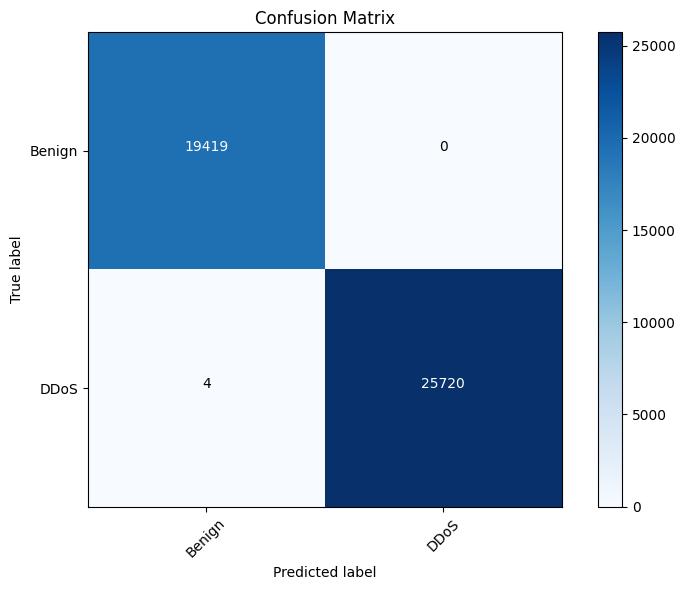

In [60]:
ddos_workflow_2017.plot_confusion_matrix(ddos_workflow_2017.y_test, ddos_workflow_2017.y_pred)

##### **ROC Curve**

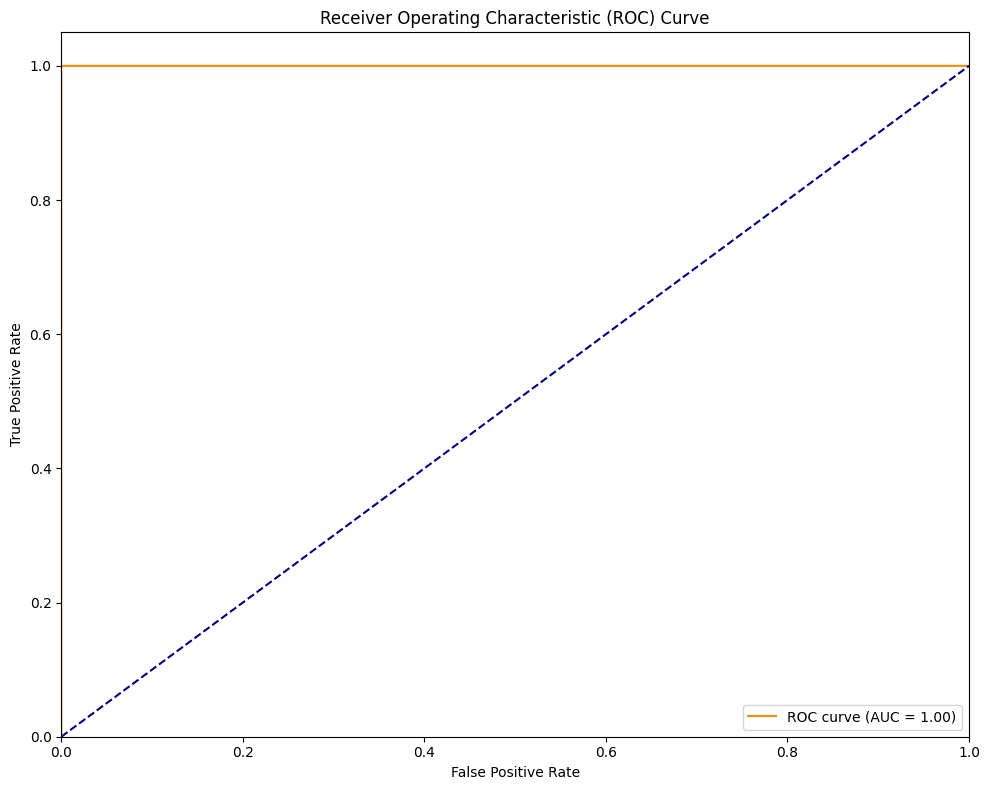

In [61]:
ddos_workflow_2017.plot_roc_curve(ddos_workflow_2017.y_test, ddos_workflow_2017.y_pred_prob)

### **2018 Data + Predictions**

In [62]:
#exclude
class_names = ['Benign', 'DDoS'] 

X_2018 = ddos_2018_df.drop(columns=['Label', 'Protocol'])
y_2018 = ddos_2018_df['Label']

ddos_workflow_2018 = RandomForestWorkflow(X_2018, y_2018, class_names)
ddos_workflow_2018.train()
ddos_workflow_2018.evaluate()

report_2018 = ddos_workflow_2018.report_df
report_2018.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2018.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2018.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2018, 'DDoS', 'Random Forest')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  22.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  36.9s
[C

##### **Classification Report**

In [63]:
ddos_workflow_2018.report_df

,precision,recall,f1-score,support
Benign,1.0,1.0,1.0,72083.0
DDoS,1.0,1.0,1.0,137632.0
Accuracy,1.0,1.0,1.0,1.0
Macro avg,1.0,1.0,1.0,209715.0
Weighted avg,1.0,1.0,1.0,209715.0


##### **Confusion Matrix**

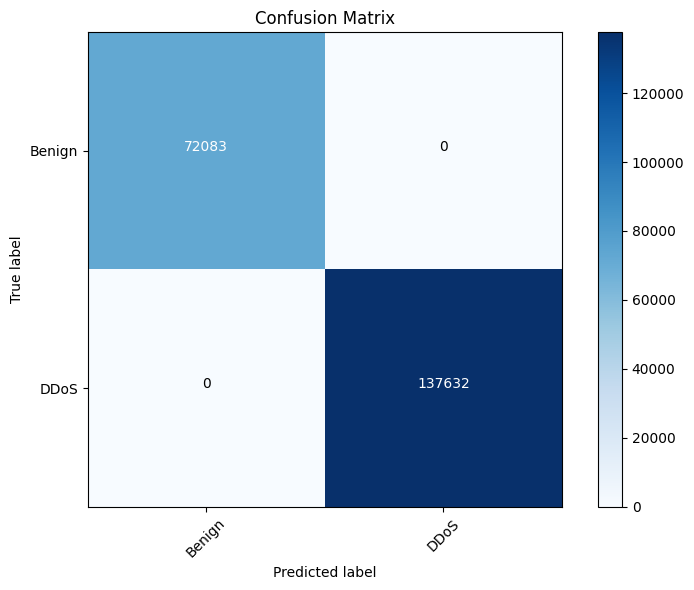

In [64]:
ddos_workflow_2018.plot_confusion_matrix(ddos_workflow_2018.y_test, ddos_workflow_2018.y_pred)

##### **ROC Curve**

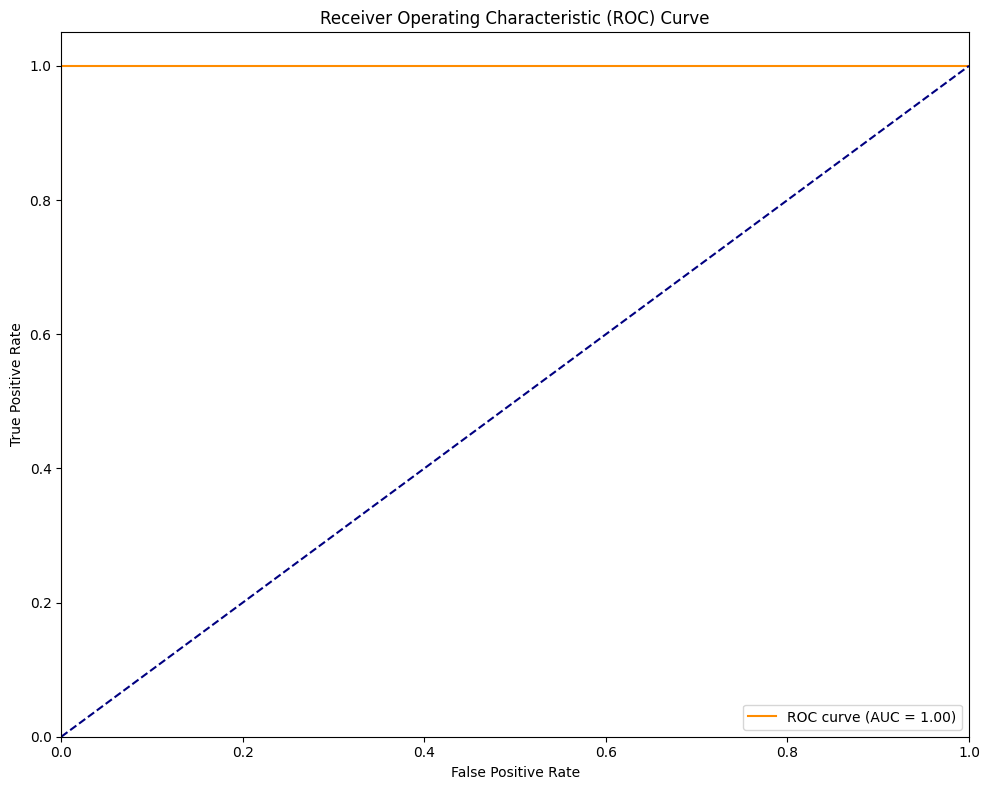

In [65]:
ddos_workflow_2018.plot_roc_curve(ddos_workflow_2018.y_test, ddos_workflow_2018.y_pred_prob)

## **DoS**

### **2017 Data + Predictions**

In [66]:
#exclude
class_names = ['Benign', 'DoS']

X_2017 = dos_2017_df.drop(columns=['Label'])
y_2017 = dos_2017_df['Label']

dos_workflow_2017 = RandomForestWorkflow(X_2017, y_2017, class_names)
dos_workflow_2017.train()
dos_workflow_2017.evaluate()

report_2017 = dos_workflow_2017.report_df
report_2017.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2017.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2017.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2017, 'DoS', 'Random Forest')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  26.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  27.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  27.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  31.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  31.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  31.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  47.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  48.2s
[CV]

##### **Classification Report**

In [67]:
dos_workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.999625,0.999637,0.999631,88068.00000
DoS,0.999363,0.999343,0.999353,50211.00000
Accuracy,0.999530,0.999530,0.999530,0.99953
Macro avg,0.999494,0.999490,0.999492,138279.00000
Weighted avg,0.999530,0.999530,0.999530,138279.00000


##### **Confusion Matrix**

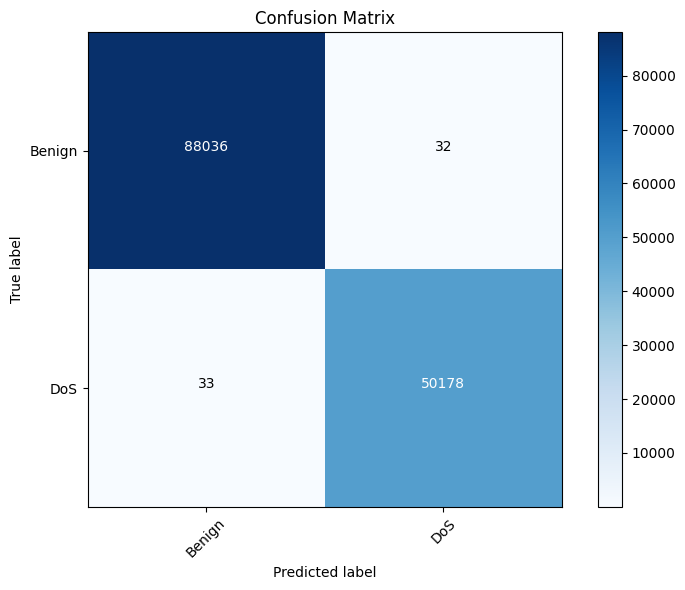

In [68]:
dos_workflow_2017.plot_confusion_matrix(dos_workflow_2017.y_test, dos_workflow_2017.y_pred)

##### **ROC Curve**

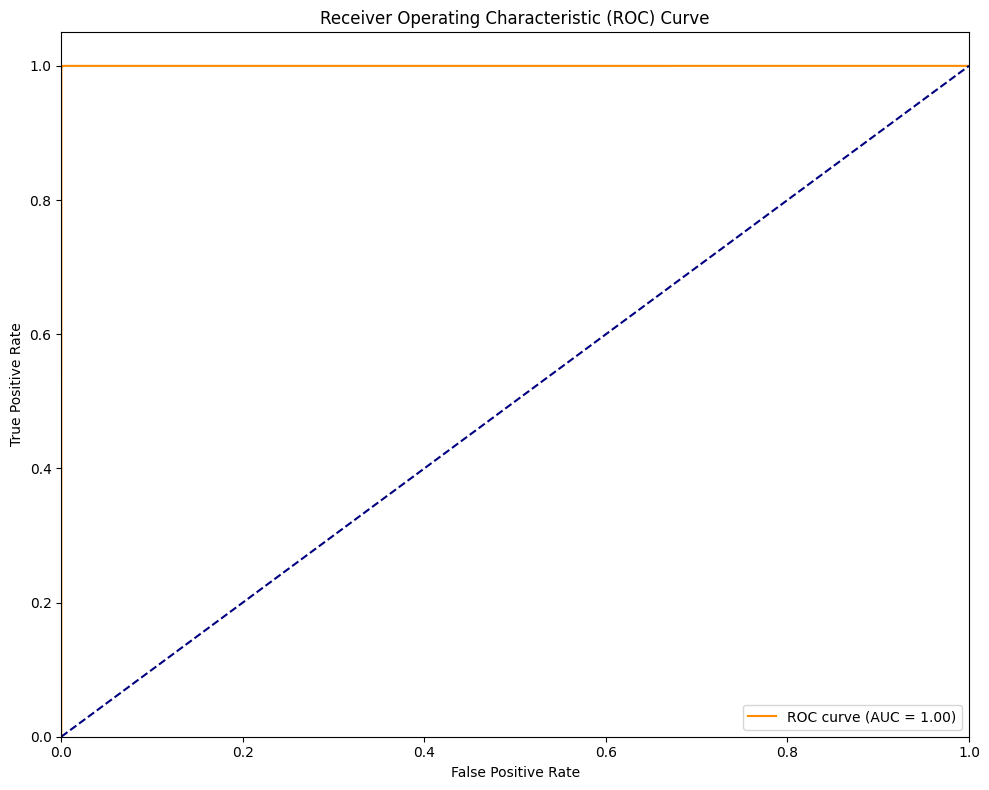

In [69]:
dos_workflow_2017.plot_roc_curve(dos_workflow_2017.y_test, dos_workflow_2017.y_pred_prob)

### **2018 Data + Predictions**

In [70]:
#exclude
X_2018 = dos_2018_df.drop(columns=['Label', 'Protocol'])
y_2018 = dos_2018_df['Label']

dos_workflow_2018 = RandomForestWorkflow(X_2018, y_2018, class_names)
dos_workflow_2018.train()
dos_workflow_2018.evaluate()

report_2018 = dos_workflow_2018.report_df
report_2018.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2018.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2018.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2018, 'DoS', 'Random Forest')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.6s


##### **Classification Report**

In [71]:
dos_workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.999625,0.999637,0.999631,88068.00000
DoS,0.999363,0.999343,0.999353,50211.00000
Accuracy,0.999530,0.999530,0.999530,0.99953
Macro avg,0.999494,0.999490,0.999492,138279.00000
Weighted avg,0.999530,0.999530,0.999530,138279.00000


##### **Confusion Matrix**

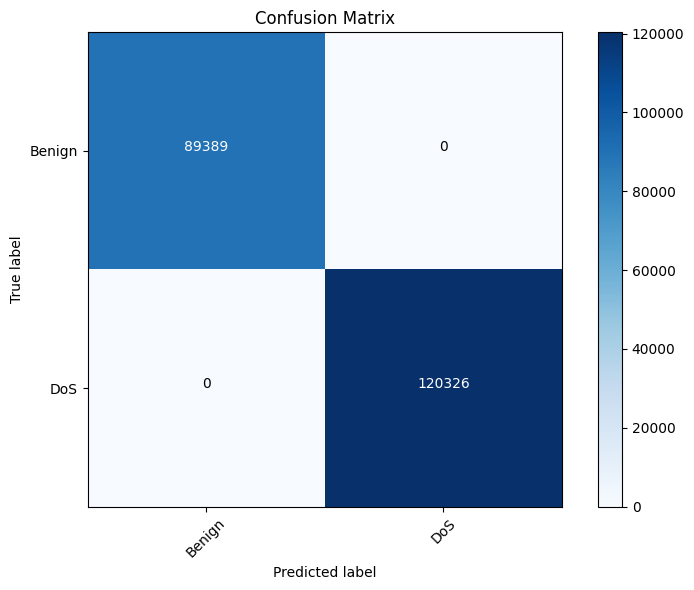

In [72]:
dos_workflow_2017.plot_confusion_matrix(dos_workflow_2018.y_test, dos_workflow_2018.y_pred)

##### **ROC Curve**

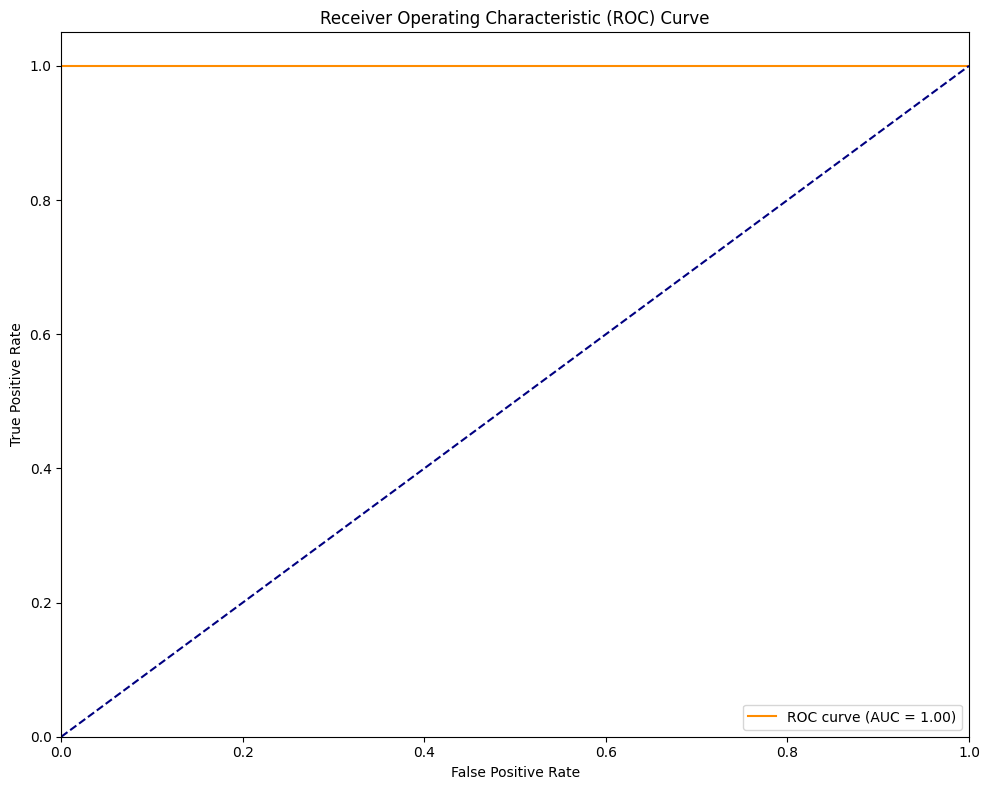

In [73]:
dos_workflow_2017.plot_roc_curve(dos_workflow_2018.y_test, dos_workflow_2018.y_pred_prob)

# **Naive Bayes**
---

Naive Bayes is a probabilistic machine learning algorithm based on Bayes’ Theorem, which calculates the likelihood of an event given prior knowledge of conditions related to the event. It is called “naive” because it assumes that all input features are independent of each other, an assumption that simplifies calculations but may not always hold true in real-world datasets. Despite this simplification, Naive Bayes is efficient, interpretable, and effective for many classification problems, especially when dealing with large datasets and categorical features. It is well-suited for tasks where speed and simplicity are critical.

In the context of detecting brute force, DDoS, and DoS attacks, Naive Bayes is particularly valuable for its ability to classify network traffic based on probabilistic patterns in the data. For brute force attacks, it can leverage features like the frequency of failed login attempts or unusual access patterns to assign probabilities to whether the behavior is normal or malicious. In the case of DDoS and DoS attacks, Naive Bayes can identify anomalies in network traffic by analyzing features such as traffic volume, packet sizes, and request intervals. Its probabilistic framework makes it adaptable to imbalanced datasets, where malicious traffic might be a small fraction of overall activity.

## **Naive Bayes Class Structure**

In [74]:
#exclude
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd

In [75]:
class NaiveBayesWorkflow:
    """
    A class to manage the workflow of training, evaluating, and predicting with a Naive Bayes model.
    """

    def __init__(self, X, y, class_names):
        """
        Initialize the workflow with data and class names.

        Parameters:
        X : DataFrame : The feature data.
        y : Series : The target labels.
        class_names : list : List of class names.
        """
        self.X = X
        self.y = y
        self.class_names = class_names
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.best_model = None
        self.y_pred = None
        self.y_pred_prob = None
        self.report_df = None

    def train(self):
        """
        Splits the data, trains the Naive Bayes model using GridSearchCV, and stores the best model.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
        grid_search = GridSearchCV(GaussianNB(), param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(self.X_train, self.y_train)

        self.best_model = grid_search.best_estimator_
        self.model = self.best_model

    def predict(self):
        """
        Generates predictions for the test set and stores them as attributes.
        """
        if self.model is None:
            raise ValueError("The model is not trained. Run the train() method first.")

        self.y_pred = self.model.predict(self.X_test)
        self.y_pred_prob = self.model.predict_proba(self.X_test)

    def evaluate(self):
        """
        Generates the classification report and stores it as an attribute.
        """
        if self.y_test is None or self.y_pred is None:
            raise ValueError("Predictions have not been made. Ensure the model is trained and predictions are generated before evaluation.")

        self.report_df = self._generate_classification_report(self.y_test, self.y_pred)

    def plot_confusion_matrix(self):
        """
        Plots the confusion matrix for the test data.
        """
        cm = confusion_matrix(self.y_test, self.y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(self.class_names))
        plt.xticks(tick_marks, self.class_names, rotation=45)
        plt.yticks(tick_marks, self.class_names)

        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, f"{cm[i, j]}",
                         horizontalalignment="center",
                         color="white" if cm[i, j] > cm.max() / 2. else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    def plot_roc_curve(self):
        """
        Plots the ROC curve for the test data.
        """
        fpr, tpr, roc_auc = {}, {}, {}

        for i, class_name in enumerate(self.class_names):
            fpr[class_name], tpr[class_name], _ = roc_curve(self.y_test == i, self.y_pred_prob[:, i])
            roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])

        plt.figure(figsize=(10, 8))
        for class_name in self.class_names:
            plt.plot(fpr[class_name], tpr[class_name], label=f'Class {class_name} (AUC = {roc_auc[class_name]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    def predict_on_new_data(self, X_new, y_new):
        """
        Predicts the labels for new data and evaluates performance.

        Parameters:
        X_new : DataFrame : The new feature data.
        y_new : Series : The new target labels.

        Returns:
        DataFrame : The classification report for the new data.
        """
        if self.model is None:
            raise ValueError("The model is not trained. Run the train() method first.")

        y_pred_new = self.best_model.predict(X_new)
        y_pred_prob_new = self.best_model.predict_proba(X_new)

        cm = confusion_matrix(y_new, y_pred_new)
        print("Confusion Matrix for New Data:")
        print(cm)

        return self._generate_classification_report(y_new, y_pred_new)

    def _generate_classification_report(self, y_true, y_pred):
        """
        Generate a classification report.

        Parameters:
        y_true : Series : True labels.
        y_pred : Series : Predicted labels.

        Returns:
        DataFrame : The classification report as a DataFrame.
        """
        report = classification_report(y_true, y_pred, target_names=self.class_names, output_dict=True)
        return pd.DataFrame(report).transpose()

## **Brute Force**

### **2017 Data + Predictions**

In [76]:
#exclude
class_names = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']
X = brute_force_2017_df.drop(columns=['Label'])
y = brute_force_2017_df['Label']

workflow_2017 = NaiveBayesWorkflow(X, y, class_names)
workflow_2017.train()
workflow_2017.predict()
workflow_2017.evaluate()

report_2017 = workflow_2017.report_df
report_2017.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2017.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2017.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2017, 'Brute Force', 'Naive Bayes')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.4s
[CV] END ................................var_smoothing=1e-09; total time=   0.4s
[CV] END ................................var_smoothing=1e-08; total time=   0.4s
[CV] END ................................var_smoothing=1e-07; total time=   0.5s
[CV] END ................................var_smoothing=1e-09; total time=   0.5s
[CV] END ................................var_smoothing=1e-08; total time=   0.5s
[CV] END ................................var_smoothing=1e-08; total time=   0.5s
[CV] END ................................var_smoothing=1e-07; total time=   0.5s
[CV] END ................................var_smoothing=1e-07; total time=   0.5s
[CV] END ................................var_smoothing=1e-06; total time=   0.4s
[CV] END ................................var_smoothing=1e-06; total time=   0.3s
[CV] END ................................var_smo

/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

##### **Classification Report**

In [77]:
workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.968372,1.000000,0.983932,86310.000000
FTP-BruteForce,0.000000,0.000000,0.000000,1587.000000
SSH-Bruteforce,0.000000,0.000000,0.000000,1232.000000
Accuracy,0.968372,0.968372,0.968372,0.968372
Macro avg,0.322791,0.333333,0.327977,89129.000000
Weighted avg,0.937744,0.968372,0.952812,89129.000000


##### **Confusion Matrix**

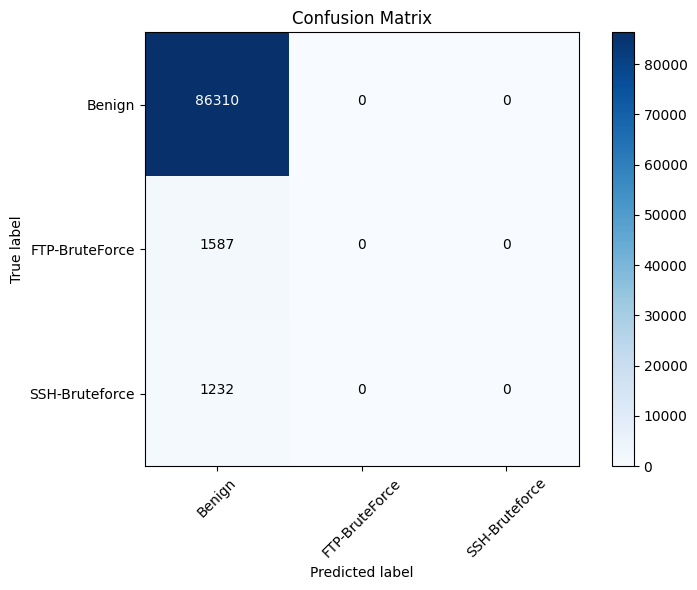

In [78]:
workflow_2017.plot_confusion_matrix()

##### **ROC Curve**

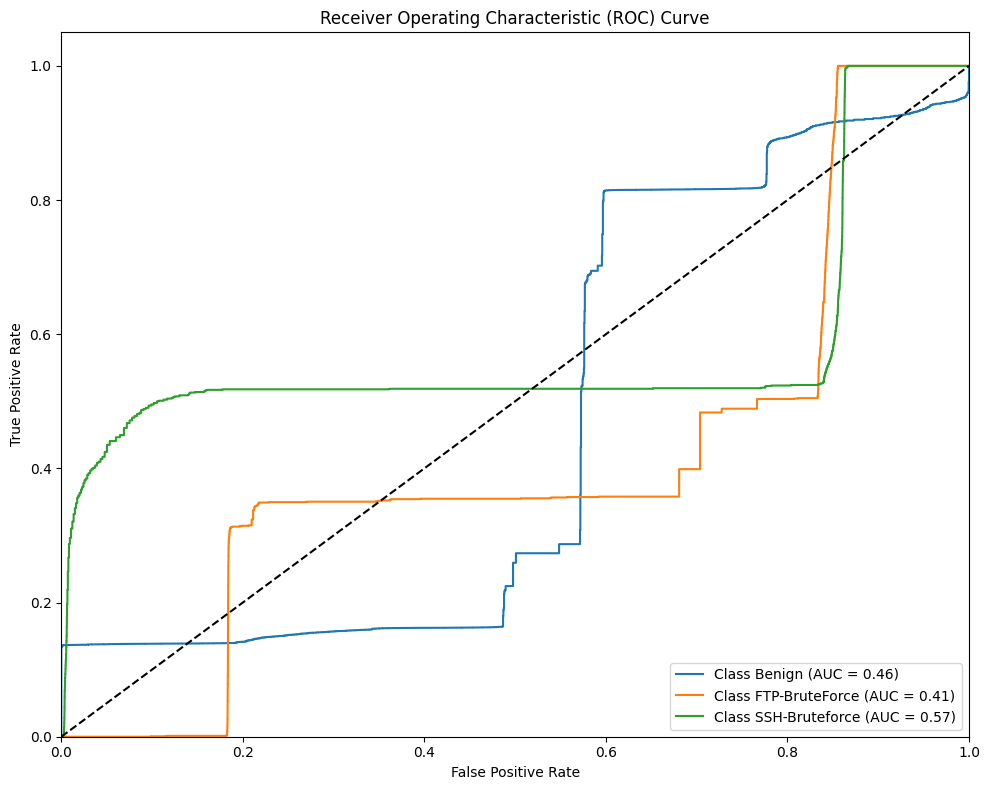

In [79]:
workflow_2017.plot_roc_curve()

### **2018 Data + Predictions**

In [80]:
#exclude
class_names = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']
X = brute_force_2018_df.drop(columns=['Label', 'Protocol'])
y = brute_force_2018_df['Label']

workflow_2018 = NaiveBayesWorkflow(X, y, class_names)
workflow_2018.train()
workflow_2018.predict()
workflow_2018.evaluate()

report_2018 = workflow_2018.report_df
report_2018.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2018.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2018.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2018, 'Brute Force', 'Naive Bayes')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-07; total time=   4.1s
[CV] END ................................var_smoothing=1e-08; total time=   5.6s
[CV] END ................................var_smoothing=1e-08; total time=   5.6s
[CV] END ................................var_smoothing=1e-06; total time=   5.5s
[CV] END ................................var_smoothing=1e-05; total time=   5.5s
[CV] END ................................var_smoothing=1e-08; total time=   5.7s
[CV] END ................................var_smoothing=1e-09; total time=   5.9s
[CV] END ................................var_smoothing=1e-06; total time=   5.9s
[CV] END ................................var_smoothing=1e-05; total time=   5.9s
[CV] END ................................var_smoothing=1e-07; total time=   6.2s
[CV] END ................................var_smoothing=1e-09; total time=   6.8s
[CV] END ................................var_smo

##### **Classification Report**

In [81]:
workflow_2018.report_df

,precision,recall,f1-score,support
Benign,1.000000,0.284199,0.442609,132745.000000
FTP-BruteForce,0.961249,0.871184,0.914003,38753.000000
SSH-Bruteforce,0.271405,0.986276,0.425672,37453.000000
Accuracy,0.518906,0.518906,0.518906,0.518906
Macro avg,0.744218,0.713886,0.594095,208951.000000
Weighted avg,0.862218,0.518906,0.527000,208951.000000


##### **Confusion Matrix**

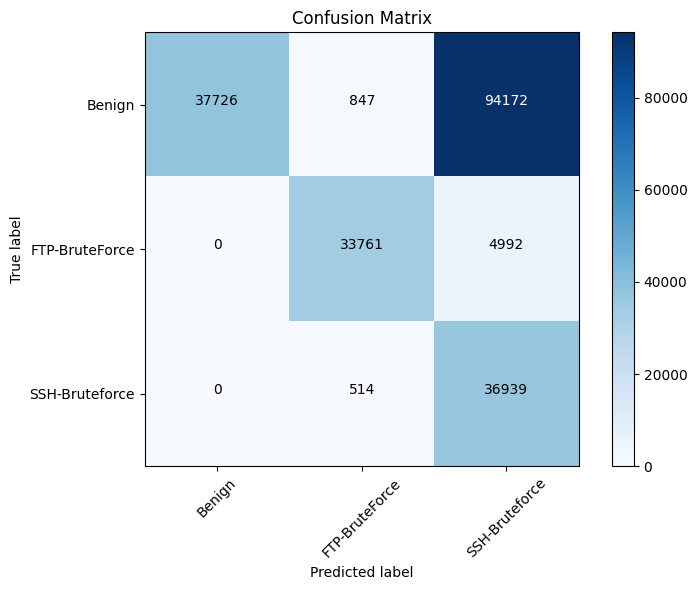

In [82]:
workflow_2018.plot_confusion_matrix()

##### **ROC Curve**

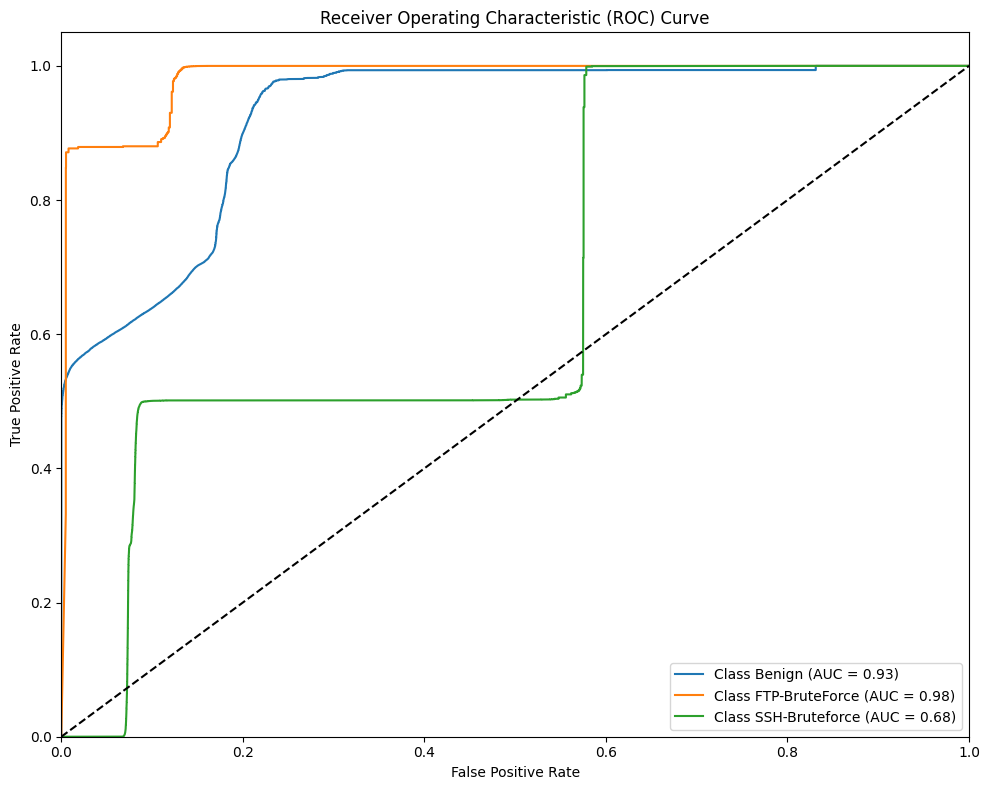

In [83]:
workflow_2018.plot_roc_curve()

## **DDoS**

### **2017 Data + Predictions**

In [84]:
#exclude
class_names = ['Benign', 'DDoS'] 
X = ddos_2017_df.drop(columns=['Label'])
y = ddos_2017_df['Label']

workflow_2017 = NaiveBayesWorkflow(X, y, class_names)
workflow_2017.train()
workflow_2017.predict()
workflow_2017.evaluate()

report_2017 = workflow_2017.report_df
report_2017.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2017.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2017.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2017, 'DDoS', 'Naive Bayes')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-08; total time=   0.2s
[CV] END ................................var_smoothing=1e-09; total time=   0.2s
[CV] END ................................var_smoothing=1e-09; total time=   0.2s
[CV] END ................................var_smoothing=1e-09; total time=   0.2s
[CV] END ................................var_smoothing=1e-08; total time=   0.2s
[CV] END ................................var_smoothing=1e-08; total time=   0.2s
[CV] END ................................var_smoothing=1e-07; total time=   0.2s
[CV] END ................................var_smoothing=1e-07; total time=   0.3s
[CV] END ................................var_smoothing=1e-06; total time=   0.2s
[CV] END ................................var_smoothing=1e-05; total time=   0.2s
[CV] END ................................var_smoothing=1e-07; total time=   0.3s
[CV] END ................................var_smo

##### **Classification Report**

In [85]:
workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.997138,0.556105,0.714007,19419.000000
DDoS,0.748783,0.998795,0.855906,25724.000000
Accuracy,0.808365,0.808365,0.808365,0.808365
Macro avg,0.872960,0.777450,0.784956,45143.000000
Weighted avg,0.855617,0.808365,0.794866,45143.000000


##### **Confusion Matrix**

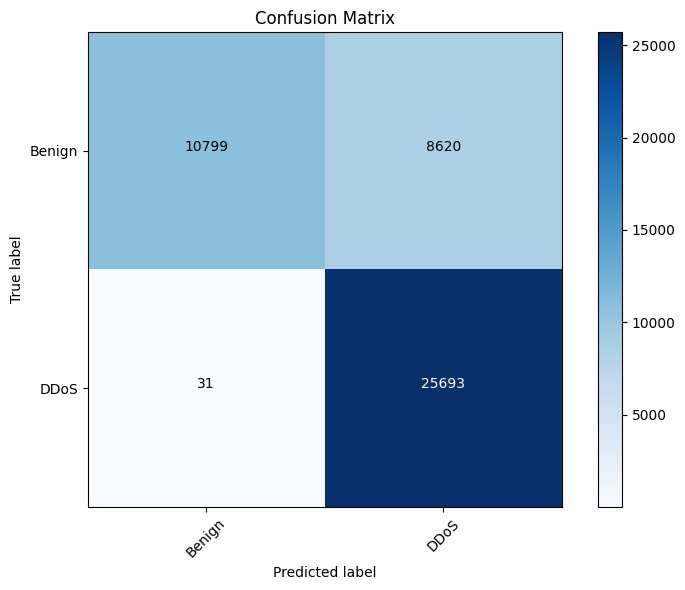

In [86]:
workflow_2017.plot_confusion_matrix()

##### **ROC Curve**

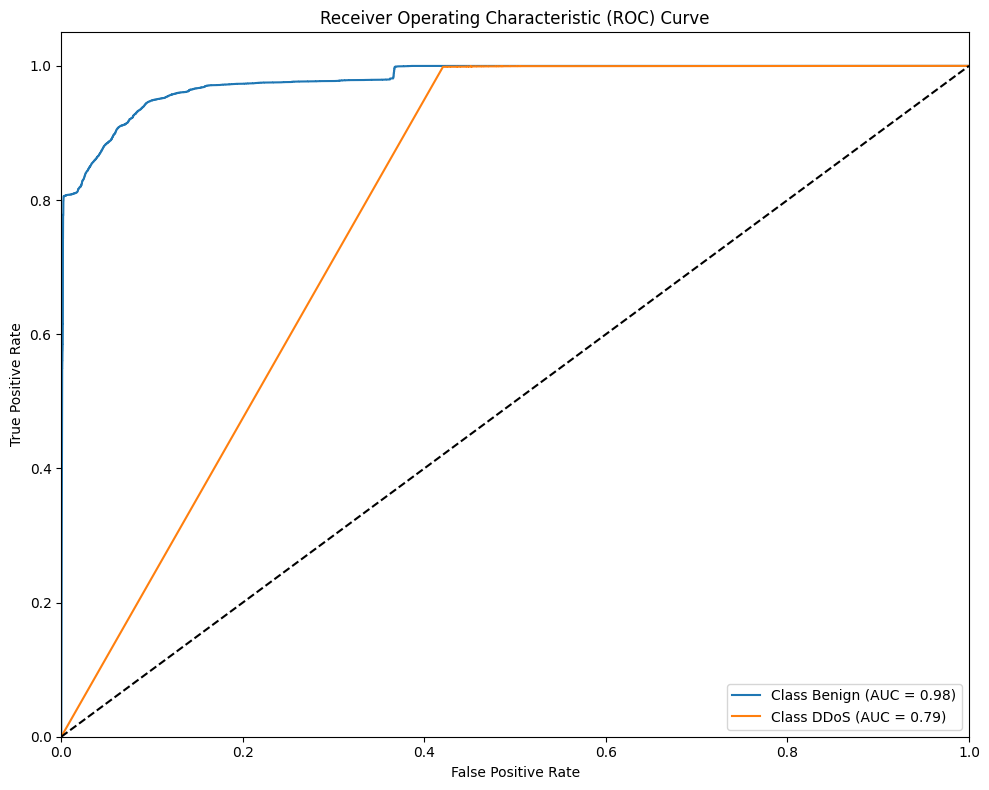

In [87]:
workflow_2017.plot_roc_curve()

### **2018 Data + Predictions**

In [88]:
#exclude
class_names = ['Benign', 'DDoS'] 
X = ddos_2018_df.drop(columns=['Label', 'Protocol'])
y = ddos_2018_df['Label']

workflow_2018 = NaiveBayesWorkflow(X, y, class_names)
workflow_2018.train()
workflow_2018.predict()
workflow_2018.evaluate()

report_2018 = workflow_2018.report_df
report_2018.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2018.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2018.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2018, 'DDoS', 'Naive Bayes')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-05; total time=   2.2s
[CV] END ................................var_smoothing=1e-09; total time=   2.2s


/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ................................var_smoothing=1e-06; total time=   1.7s
[CV] END ...............................var_smoothing=0.0001; total time=   1.0s
[CV] END ................................var_smoothing=1e-06; total time=   5.0s
[CV] END ................................var_smoothing=1e-07; total time=   5.2s
[CV] END ................................var_smoothing=1e-09; total time=   5.3s
[CV] END ................................var_smoothing=1e-06; total time=   5.3s
[CV] END ................................var_smoothing=1e-05; total time=   2.9s
[CV] END ................................var_smoothing=1e-08; total time=   5.9s
[CV] END ...............................var_smoothing=0.0001; total time=   4.5s
[CV] END ................................var_smoothing=1e-08; total time=   8.1s
[CV] END ................................var_smoothing=1e-05; total time=   8.2s
[CV] END ...............................var_smoothing=0.0001; total time=   3.4s
[CV] END ...................

##### **Classification Report**

In [89]:
workflow_2018.report_df

,precision,recall,f1-score,support
Benign,1.000000,0.999931,0.999965,72083.000000
DDoS,0.999964,1.000000,0.999982,137632.000000
Accuracy,0.999976,0.999976,0.999976,0.999976
Macro avg,0.999982,0.999965,0.999974,209715.000000
Weighted avg,0.999976,0.999976,0.999976,209715.000000


##### **Confusion Matrix**

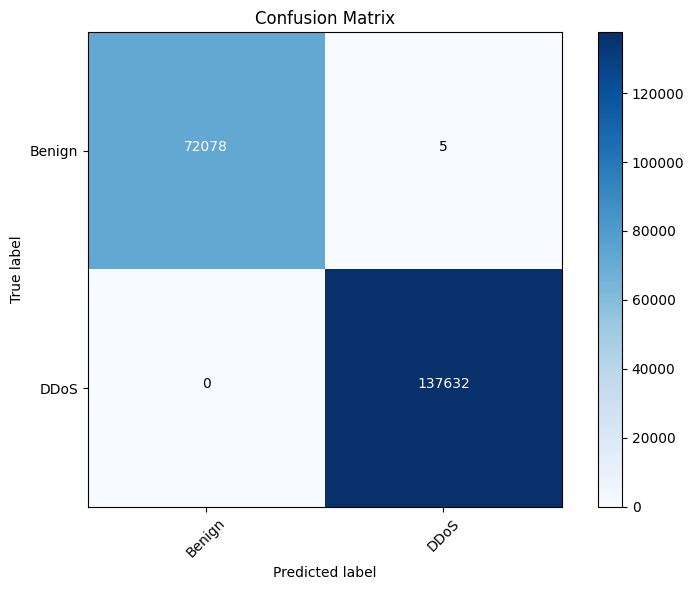

In [90]:
workflow_2018.plot_confusion_matrix()

##### **ROC Curve**

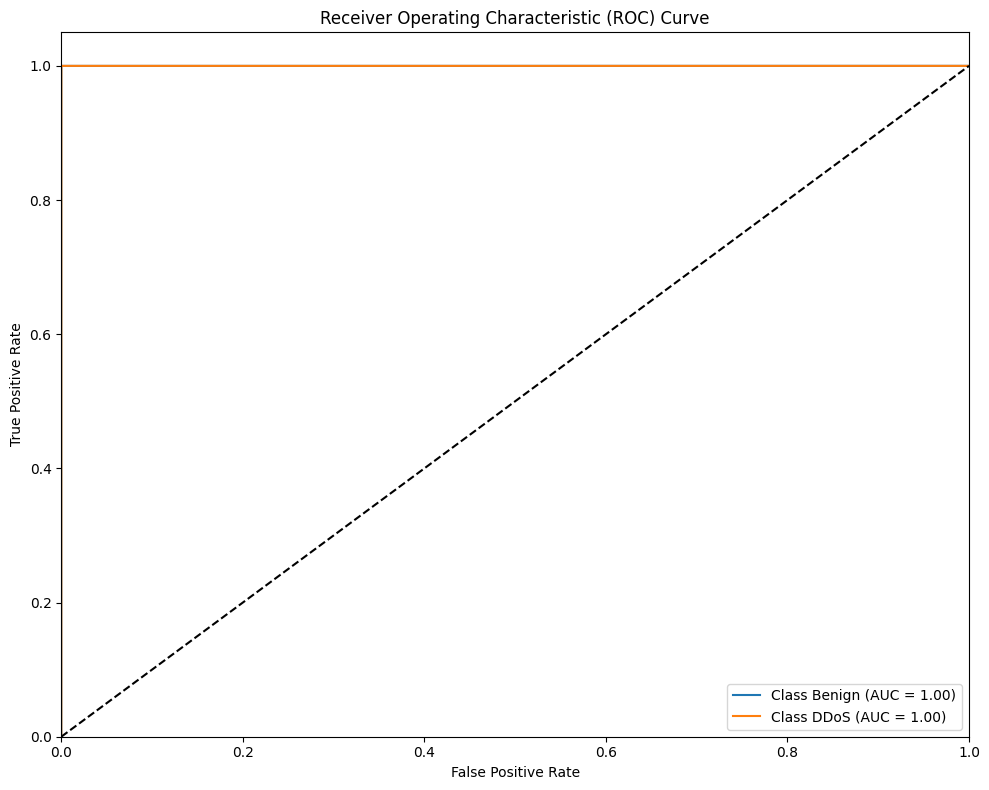

In [91]:
workflow_2018.plot_roc_curve()

## **DoS**

### **2017 Data + Predictions**

In [92]:
#exclude
class_names = ['Benign', 'DoS'] 
X = dos_2017_df.drop(columns=['Label'])
y = dos_2017_df['Label']

workflow_2017 = NaiveBayesWorkflow(X, y, class_names)
workflow_2017.train()
workflow_2017.predict()
workflow_2017.evaluate()

report_2017 = workflow_2017.report_df
report_2017.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2017.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2017.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2017, 'DoS', 'Naive Bayes')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.9s
[CV] END ................................var_smoothing=1e-09; total time=   1.1s
[CV] END ................................var_smoothing=1e-09; total time=   1.1s
[CV] END ................................var_smoothing=1e-08; total time=   1.1s
[CV] END ................................var_smoothing=1e-07; total time=   1.2s
[CV] END ................................var_smoothing=1e-08; total time=   1.5s
[CV] END ................................var_smoothing=1e-08; total time=   1.6s
[CV] END ................................var_smoothing=1e-05; total time=   1.3s
[CV] END ................................var_smoothing=1e-06; total time=   1.3s
[CV] END ................................var_smoothing=1e-06; total time=   1.4s
[CV] END ................................var_smoothing=1e-05; total time=   1.4s
[CV] END ................................var_smo

##### **Classification Report**

In [93]:
workflow_2017.report_df

,precision,recall,f1-score,support
Benign,0.845187,0.940092,0.890117,88068.000000
DoS,0.869153,0.697975,0.774215,50211.000000
Accuracy,0.852176,0.852176,0.852176,0.852176
Macro avg,0.857170,0.819033,0.832166,138279.000000
Weighted avg,0.853890,0.852176,0.848031,138279.000000


##### **Confusion Matrix**

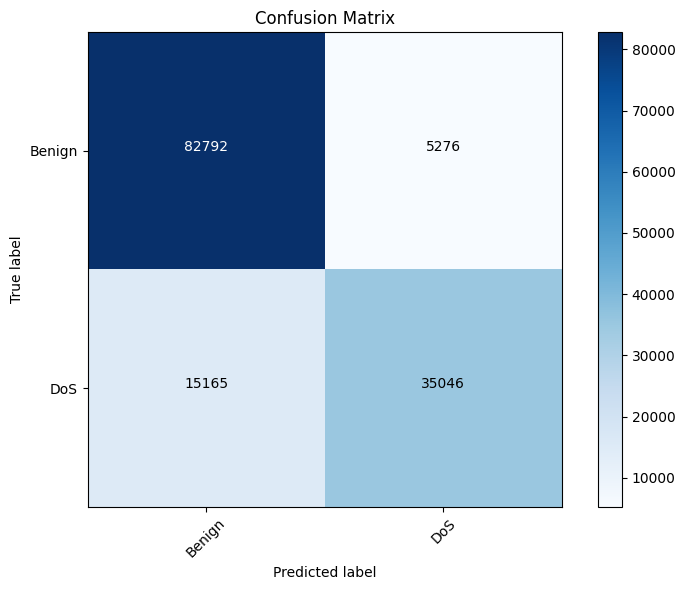

In [94]:
workflow_2017.plot_confusion_matrix()

##### **ROC Curve**

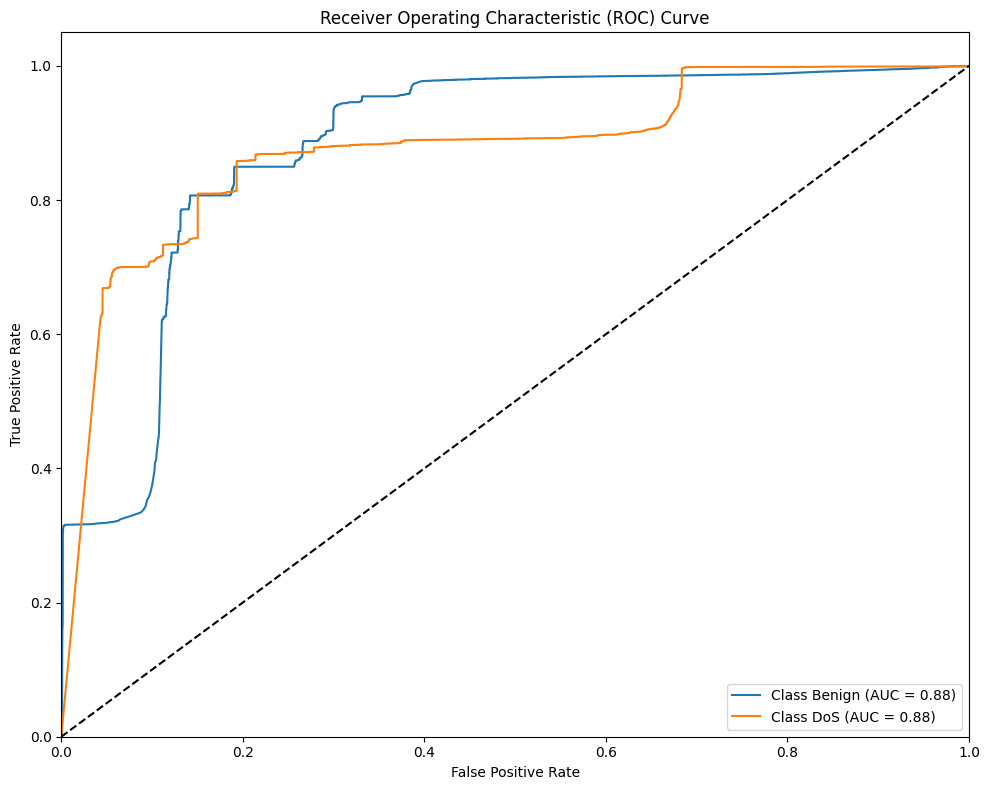

In [95]:
workflow_2017.plot_roc_curve()

### **2018 Data + Predictions**

In [96]:
#exclude
class_names = ['Benign', 'DoS'] 
X = dos_2018_df.drop(columns=['Label', 'Protocol'])
y = dos_2018_df['Label']

workflow_2018 = NaiveBayesWorkflow(X, y, class_names)
workflow_2018.train()
workflow_2018.predict()
workflow_2018.evaluate()

report_2018 = workflow_2018.report_df
report_2018.rename(index={'weighted avg': 'Weighted avg'}, inplace=True)
report_2018.rename(index={'macro avg': 'Macro avg'}, inplace=True)
report_2018.rename(index={'accuracy': 'Accuracy'}, inplace=True)

metrics_df = collect_metrics(report_2018, 'DoS', 'Naive Bayes')
metrics_list.append(metrics_df)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-09; total time=   1.6s


/Users/spencerdearman/ml-cs/final-project-kanchan-spencer/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ................................var_smoothing=1e-09; total time=   1.5s
[CV] END ................................var_smoothing=1e-09; total time=   1.5s
[CV] END ................................var_smoothing=1e-08; total time=   1.6s
[CV] END ................................var_smoothing=1e-08; total time=   1.6s
[CV] END ................................var_smoothing=1e-08; total time=   1.6s
[CV] END ................................var_smoothing=1e-07; total time=   1.6s
[CV] END ................................var_smoothing=1e-07; total time=   1.5s
[CV] END ................................var_smoothing=1e-07; total time=   1.5s
[CV] END ................................var_smoothing=1e-06; total time=   1.6s
[CV] END ................................var_smoothing=1e-06; total time=   1.6s
[CV] END ................................var_smoothing=1e-06; total time=   1.6s
[CV] END ................................var_smoothing=1e-05; total time=   1.5s
[CV] END ...................

##### **Classification Report**

In [97]:
workflow_2018.report_df

,precision,recall,f1-score,support
Benign,0.996054,0.999676,0.997862,89389.000000
DoS,0.999758,0.997058,0.998406,120326.000000
Accuracy,0.998174,0.998174,0.998174,0.998174
Macro avg,0.997906,0.998367,0.998134,209715.000000
Weighted avg,0.998179,0.998174,0.998174,209715.000000


##### **Confusion Matrix**

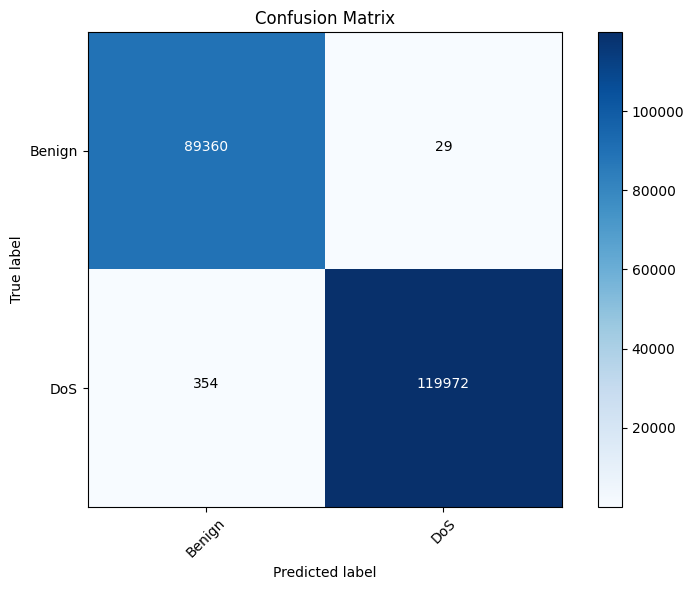

In [98]:
workflow_2018.plot_confusion_matrix()

##### **ROC Curve**

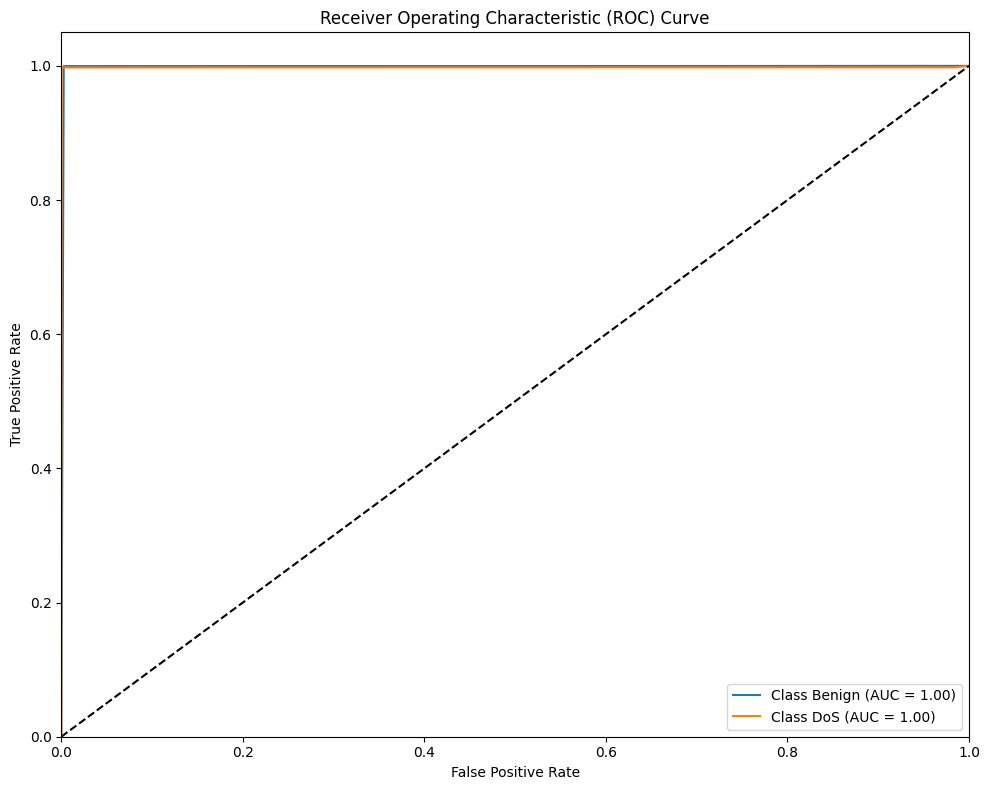

In [99]:
workflow_2018.plot_roc_curve()

# **Comparisons**
---

## **Feature Importance**

For each model, we generated a graph of feature importances to better indicate which aspects of the traffic data were most important to the model for detection. This also helped us detect any potential spurious correlations, where features that are actually irrelevant to attack detection are being prioritized by the model. It also helped us better learn about the structure of network attacks and how they are represented in traffic data.

### **Brute Force**

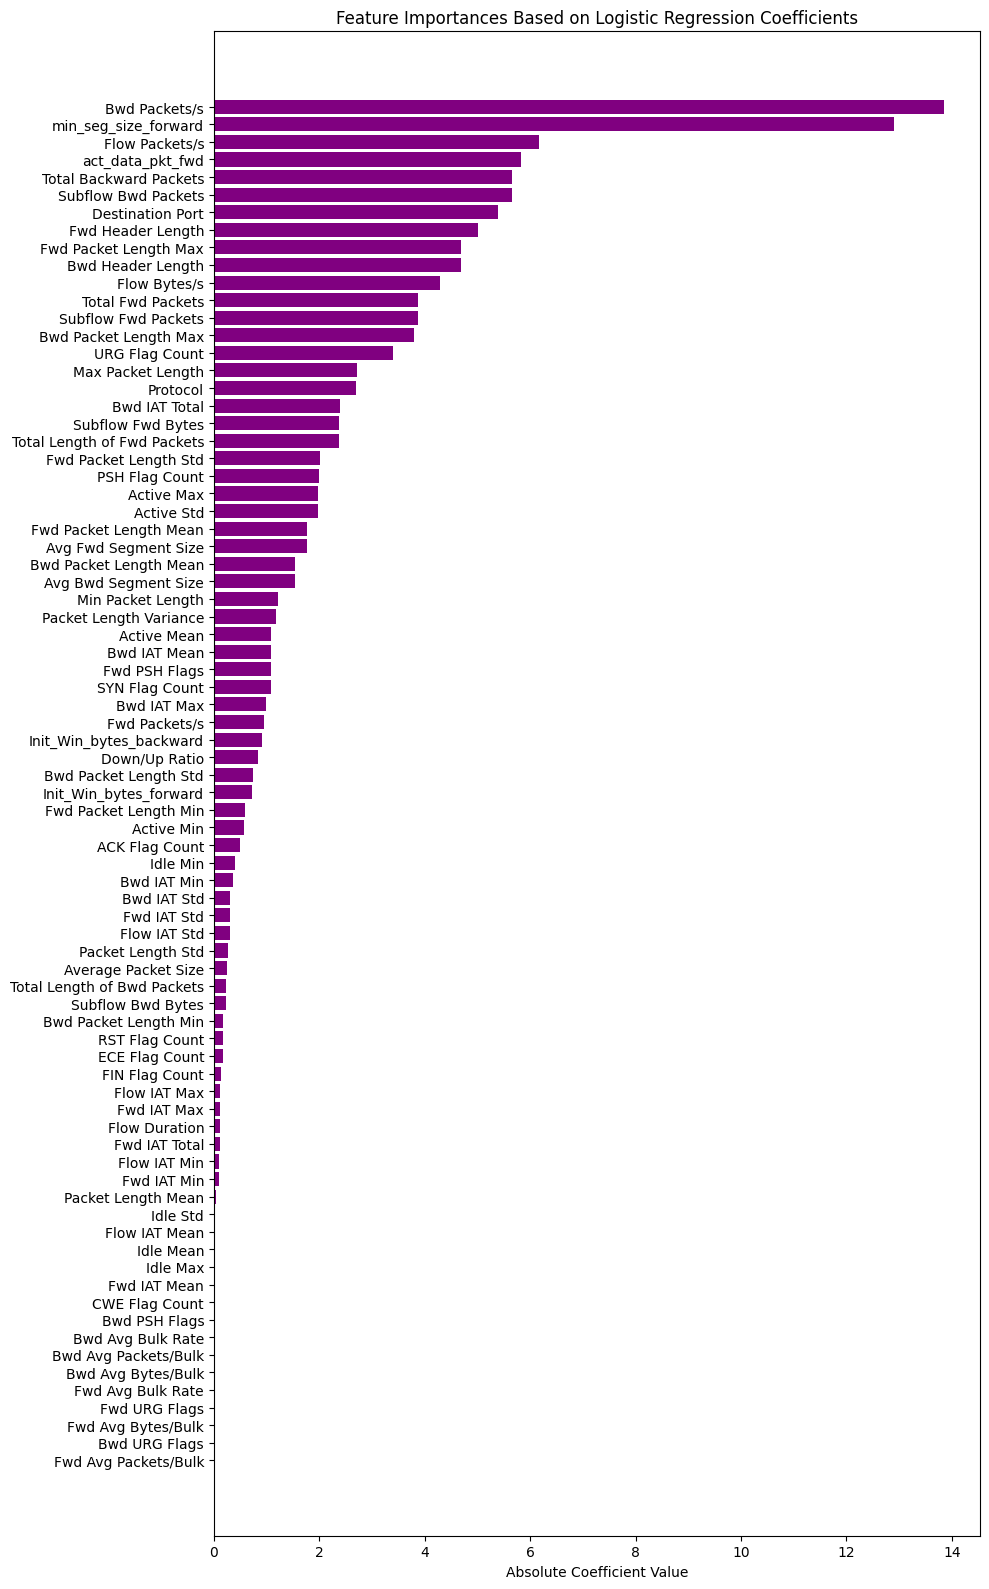

In [100]:
brute_workflow.plot_feature_importance()

Backward packets were the top feature for detecting brute force attacks. A backward packet refers to the traffic sent from the target server back to the client. During a brute force attack, the attacker repeatedly attempts to log in with different credentials, triggering numerous responses from the server, such as error messages or login status updates. This increased volume of backward packets is a strong indicator of brute force activity, so it being a key feature is consistent with the nature of the attack. 

### **DDoS**

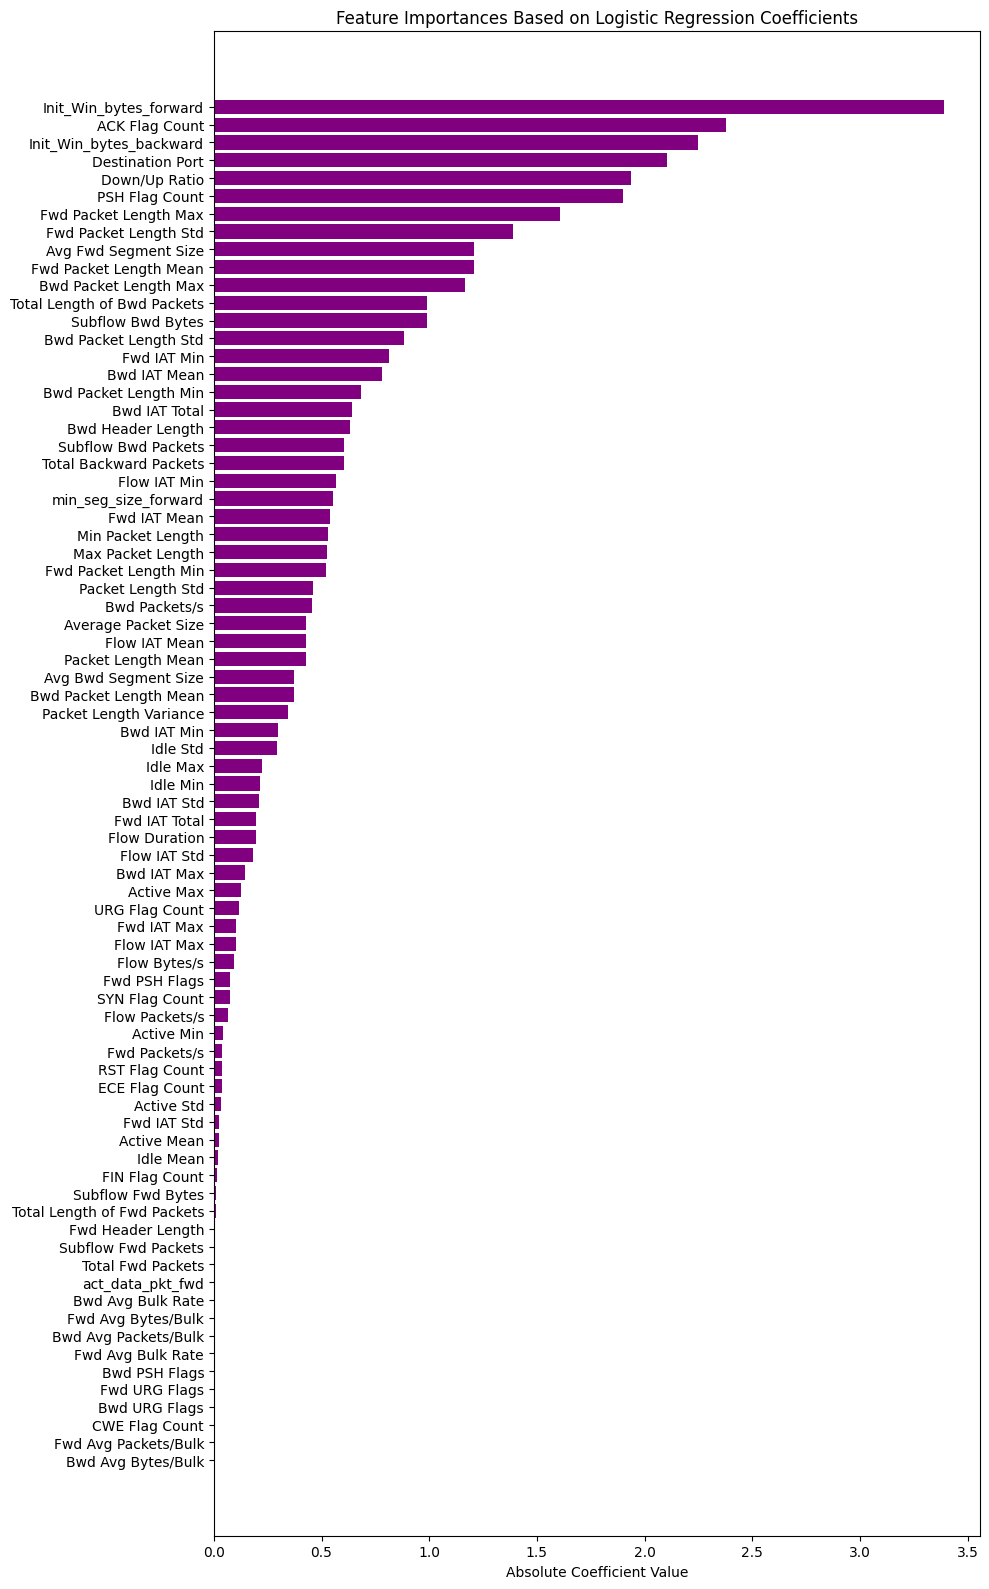

In [101]:
ddos_workflow.plot_feature_importance()

Init_win_bytes_forward was the top feature for detecting DDoS attacks. This feature refers to the initial window size (the amount of data that can be sent over a connection before receiving an acknowledgment from the receiver) from the client to the server. During a DDoS attack, a large number of malicious requests are sent to overwhelm the target system, often involving high-volume traffic that can lead to abnormal window size patterns in the network flows. 

### **DoS**

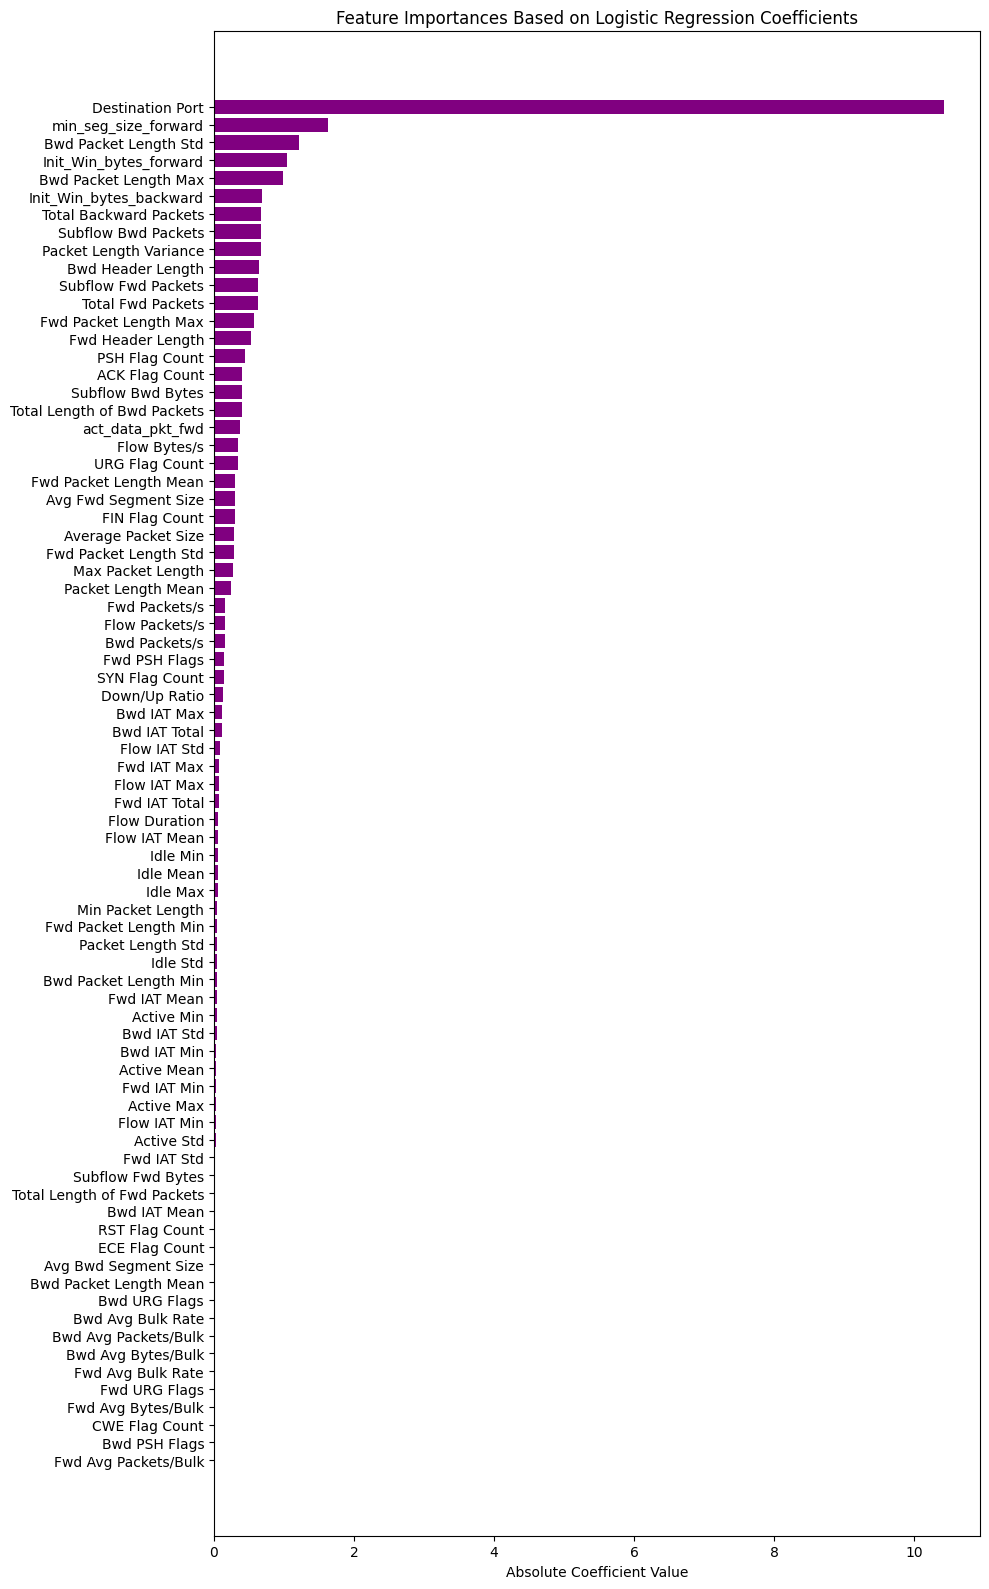

In [102]:
dos_workflow.plot_feature_importance()

Destination port was the top feature for detecting DoS attacks. During a DoS attack, the attacker typically floods the target with a high volume of requests aimed at a specific service, causing the destination port to experience an unusual spike in traffic. This concentrated targeting of a particular port makes the destination port a strong feature for detecting DoS attacks, as it can easily distinguish attack traffic from normal network activity that is distributed across multiple services.

## **Overall Model Performance**

In [103]:
#exclude
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.drop(columns=['Accuracy'])

plt.figure(figsize=(12, 8))
metrics_melted = metrics_df.melt(
    id_vars=['attack_type', 'model_type'], 
    var_name='Metric', 
    value_name='Value'
)

<Figure size 1200x800 with 0 Axes>

/var/folders/zz/1dtb5n794qbf5bn8fxwmn2zw0000gn/T/ipykernel_50983/1070574859.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


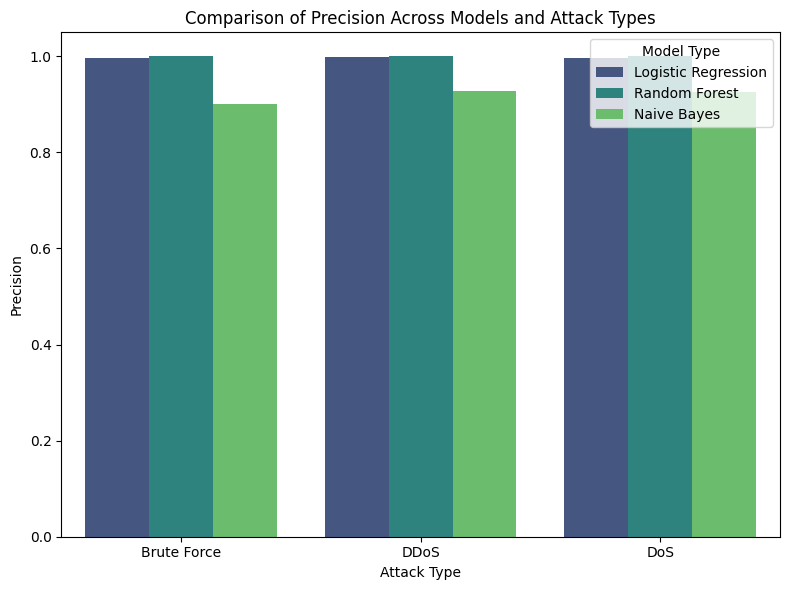

/var/folders/zz/1dtb5n794qbf5bn8fxwmn2zw0000gn/T/ipykernel_50983/1070574859.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


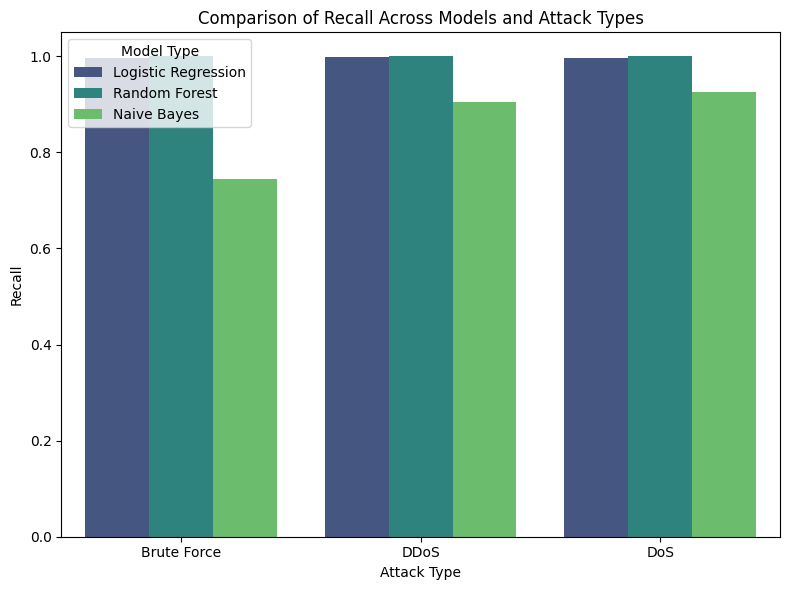

/var/folders/zz/1dtb5n794qbf5bn8fxwmn2zw0000gn/T/ipykernel_50983/1070574859.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


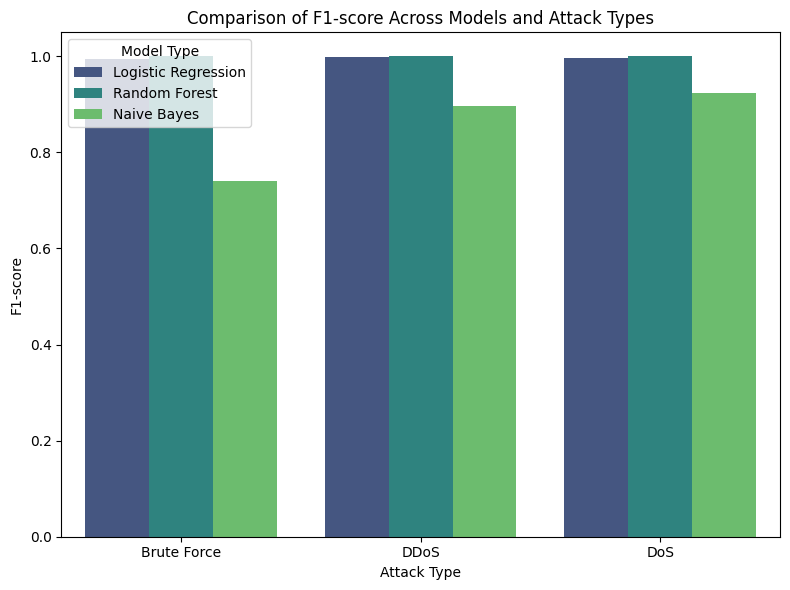

In [104]:
for metric in metrics_melted['Metric'].unique():
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=metrics_melted[metrics_melted['Metric'] == metric],
        x='attack_type',
        y='Value',
        hue='model_type',
        ci=None,
        palette='viridis'
    )
    plt.title(f'Comparison of {metric.capitalize()} Across Models and Attack Types')
    plt.xlabel('Attack Type')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Model Type')
    plt.tight_layout()
    plt.show()

In [105]:
#exclude
avg_f1_scores = metrics_df.groupby('model_type')['f1-score'].mean()
best_model = avg_f1_scores.idxmax()
best_f1_score = avg_f1_scores.max()

In [106]:
print(f"The overall best model is: {best_model}")
print(f"The average F1-score of this model is: {best_f1_score:.4f}")
print("\nAverage F1-scores of all models:")
print(avg_f1_scores)
metrics_df

The overall best model is: Random Forest
The average F1-score of this model is: 0.9999

Average F1-scores of all models:
model_type
Logistic Regression    0.996879
Naive Bayes            0.853477
Random Forest          0.999890
Name: f1-score, dtype: float64


,precision,recall,f1-score,attack_type,model_type
Weighted avg,0.991651,0.991888,0.990658,Brute Force,Logistic Regression
Weighted avg,0.999857,0.999856,0.999856,Brute Force,Logistic Regression
Weighted avg,0.998871,0.998870,0.998870,DDoS,Logistic Regression
Weighted avg,0.999995,0.999995,0.999995,DDoS,Logistic Regression
Weighted avg,0.991898,0.991900,0.991898,DoS,Logistic Regression
Weighted avg,0.999995,0.999995,0.999995,DoS,Logistic Regression
Weighted avg,0.999944,0.999944,0.999944,Brute Force,Random Forest
Weighted avg,0.999952,0.999952,0.999952,Brute Force,Random Forest
Weighted avg,0.999911,0.999911,0.999911,DDoS,Random Forest
Weighted avg,1.000000,1.000000,1.000000,DDoS,Random Forest


# **Conclusion**
---

The overall results of this project highlight key findings regarding the performance of different machine learning models in detecting network attacks. We evaluated model performance using F1 scores, a commonly used metric for assessing the balance between precision and recall in classification tasks. Our analysis revealed that, while all models exhibited similar success in detecting brute force attacks, the performance for DDoS and DoS attacks varied significantly across model types. This discrepancy is likely due to the uneven distribution of data for each attack type in the datasets, which were not consistently balanced. Specifically, brute force attack flows had substantially higher traffic volume compared to DDoS and DoS attacks, which likely contributed to the more stable performance of the models on this particular attack type. In contrast, for attack types with less abundant training data, model performance was more variable.

Through averaging the F1 scores, we identified logistic regression as the most effective model for detecting all three attack types, achieving an average F1 score of 0.62. The relatively superior performance of logistic regression may be attributed to its suitability for smaller datasets and its strength in binary classification tasks, such as distinguishing between benign and malicious traffic. However, it is important to consider several limitations within our project design and dataset that may influence the interpretation of these results.

First, there were notable inconsistencies in the availability of training data from 2017 and test data from 2018. The DoS attack class, for example, exhibited an imbalance between benign and attack packets, which could have led to biased predictions, with the model potentially favoring benign traffic. When datasets are imbalanced, models tend to perform better on the majority class, which may have contributed to the underperformance in detecting DoS attacks.

Another limitation lies in the generation of the packet capture data. Due to privacy constraints, the researchers could not use real network traffic and instead simulated both benign and attack traffic over a one-week period. This simulated traffic may not accurately reflect real-world network behavior, which could affect the generalizability of our results.

Finally, our own project design may have been overly complex, as we attempted to study multiple attack types simultaneously. To better understand how machine learning models respond to attacks that evolve over time, a larger and more diverse dataset spanning several years would be necessary. In the original design for this study, the goal was to incorporate the **CCIDOS2019** dataset as well, to evaluate the performance of these models over three years; however, there was not sufficient data for all three attack types present in all three datasets. This points to a larger issue with our source of data: the attack types and the volume of data available for each attack have not been consistently maintained across years, making it difficult to normalize and compare multiple datasets from the same source. In hindsight, focusing on a single attack type, such as DDoS, could have simplified the analysis and yielded more precise insights into model performance over time.

If we were to expand the study's evaluation metrics, we would also have included an analysis of processing time and cost for the different machine learning models, including CPU, GPU, and memory usage. This would have been highly relevant to network administrators and cybersecurity companies, who often face the challenge that the best-performing model is not necessarily the one with the highest accuracy, but the one that is also cost-effective and efficient to deploy in a real-world setting.
